In [51]:
import uproot  # For loading ROOT files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [52]:
from data import CCV1
from torch_geometric.data import DataLoader 

In [53]:
testpath = "/vols/cms/mm1221/Data/2pi/test/"  # Replace with your ROOT file path
data_test = CCV1(testpath, max_events=12000, inp = 'test')

test_loader = DataLoader(data_test, batch_size=1, shuffle=False, follow_batch=['x'])

### Loading tracksters data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.84s/it]
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [54]:
print(data_test[0].assoc)

tensor([[1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.]])


In [55]:
# Initialize model and load state dictionary
from model import Net
model = Net()
checkpoint= torch.load('/vols/cms/mm1221/hgcal/TrackPi/NoGeo/results/init/best-epoch.pt',  map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model'])  # Directly use the loaded checkpoint
model.eval()  # Set model to evaluation mode

Net(
  (lc_encode): Sequential(
    (0): Linear(in_features=15, out_features=64, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ELU(alpha=1.0)
  )
  (conv1): CustomStaticEdgeConv(
    (nn_module): Sequential(
      (0): Linear(in_features=128, out_features=64, bias=True)
      (1): ELU(alpha=1.0)
      (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (conv2): CustomStaticEdgeConv(
    (nn_module): Sequential(
      (0): Linear(in_features=128, out_features=64, bias=True)
      (1): ELU(alpha=1.0)
      (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (conv3): CustomStaticEdgeConv(
    (nn_module): Sequential(
      (0): Linear(in_features=128, out_features=64, bias=True)
      (1): ELU(alpha=1.0)
      (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (output): Sequential(
    (0): Linear(

In [56]:
from torch_geometric.nn import knn_graph

all_predictions = []  # List to store predictions for all events

# Loop through all events in the test dataset
for i, data in enumerate(data_test):
    print(f"Processing event {i+1}/{len(data_test)}...")

    # Compute k-nearest neighbor graph for the event
    edge_index = knn_graph(data.x, k=8)  # Adjust 'k' as needed
    
    # Generate predictions for the event
    predictions = model(data.x, edge_index, 1)
    
    # Store predictions
    all_predictions.append(predictions[0].detach().cpu().numpy())  # Convert to numpy if needed

# Convert list of predictions to a single numpy array
all_predictions = np.array(all_predictions)

# Print result
print("Predictions for all events shape:", all_predictions.shape)


Processing event 1/3530...
Processing event 2/3530...
Processing event 3/3530...
Processing event 4/3530...
Processing event 5/3530...
Processing event 6/3530...
Processing event 7/3530...
Processing event 8/3530...
Processing event 9/3530...
Processing event 10/3530...
Processing event 11/3530...
Processing event 12/3530...
Processing event 13/3530...
Processing event 14/3530...
Processing event 15/3530...
Processing event 16/3530...
Processing event 17/3530...
Processing event 18/3530...
Processing event 19/3530...
Processing event 20/3530...
Processing event 21/3530...
Processing event 22/3530...
Processing event 23/3530...
Processing event 24/3530...
Processing event 25/3530...
Processing event 26/3530...
Processing event 27/3530...
Processing event 28/3530...
Processing event 29/3530...
Processing event 30/3530...
Processing event 31/3530...
Processing event 32/3530...
Processing event 33/3530...
Processing event 34/3530...
Processing event 35/3530...
Processing event 36/3530...
P

Processing event 296/3530...
Processing event 297/3530...
Processing event 298/3530...
Processing event 299/3530...
Processing event 300/3530...
Processing event 301/3530...
Processing event 302/3530...
Processing event 303/3530...
Processing event 304/3530...
Processing event 305/3530...
Processing event 306/3530...
Processing event 307/3530...
Processing event 308/3530...
Processing event 309/3530...
Processing event 310/3530...
Processing event 311/3530...
Processing event 312/3530...
Processing event 313/3530...
Processing event 314/3530...
Processing event 315/3530...
Processing event 316/3530...
Processing event 317/3530...
Processing event 318/3530...
Processing event 319/3530...
Processing event 320/3530...
Processing event 321/3530...
Processing event 322/3530...
Processing event 323/3530...
Processing event 324/3530...
Processing event 325/3530...
Processing event 326/3530...
Processing event 327/3530...
Processing event 328/3530...
Processing event 329/3530...
Processing eve

Processing event 602/3530...
Processing event 603/3530...
Processing event 604/3530...
Processing event 605/3530...
Processing event 606/3530...
Processing event 607/3530...
Processing event 608/3530...
Processing event 609/3530...
Processing event 610/3530...
Processing event 611/3530...
Processing event 612/3530...
Processing event 613/3530...
Processing event 614/3530...
Processing event 615/3530...
Processing event 616/3530...
Processing event 617/3530...
Processing event 618/3530...
Processing event 619/3530...
Processing event 620/3530...
Processing event 621/3530...
Processing event 622/3530...
Processing event 623/3530...
Processing event 624/3530...
Processing event 625/3530...
Processing event 626/3530...
Processing event 627/3530...
Processing event 628/3530...
Processing event 629/3530...
Processing event 630/3530...
Processing event 631/3530...
Processing event 632/3530...
Processing event 633/3530...
Processing event 634/3530...
Processing event 635/3530...
Processing eve

Processing event 909/3530...
Processing event 910/3530...
Processing event 911/3530...
Processing event 912/3530...
Processing event 913/3530...
Processing event 914/3530...
Processing event 915/3530...
Processing event 916/3530...
Processing event 917/3530...
Processing event 918/3530...
Processing event 919/3530...
Processing event 920/3530...
Processing event 921/3530...
Processing event 922/3530...
Processing event 923/3530...
Processing event 924/3530...
Processing event 925/3530...
Processing event 926/3530...
Processing event 927/3530...
Processing event 928/3530...
Processing event 929/3530...
Processing event 930/3530...
Processing event 931/3530...
Processing event 932/3530...
Processing event 933/3530...
Processing event 934/3530...
Processing event 935/3530...
Processing event 936/3530...
Processing event 937/3530...
Processing event 938/3530...
Processing event 939/3530...
Processing event 940/3530...
Processing event 941/3530...
Processing event 942/3530...
Processing eve

Processing event 1198/3530...
Processing event 1199/3530...
Processing event 1200/3530...
Processing event 1201/3530...
Processing event 1202/3530...
Processing event 1203/3530...
Processing event 1204/3530...
Processing event 1205/3530...
Processing event 1206/3530...
Processing event 1207/3530...
Processing event 1208/3530...
Processing event 1209/3530...
Processing event 1210/3530...
Processing event 1211/3530...
Processing event 1212/3530...
Processing event 1213/3530...
Processing event 1214/3530...
Processing event 1215/3530...
Processing event 1216/3530...
Processing event 1217/3530...
Processing event 1218/3530...
Processing event 1219/3530...
Processing event 1220/3530...
Processing event 1221/3530...
Processing event 1222/3530...
Processing event 1223/3530...
Processing event 1224/3530...
Processing event 1225/3530...
Processing event 1226/3530...
Processing event 1227/3530...
Processing event 1228/3530...
Processing event 1229/3530...
Processing event 1230/3530...
Processing

Processing event 1502/3530...
Processing event 1503/3530...
Processing event 1504/3530...
Processing event 1505/3530...
Processing event 1506/3530...
Processing event 1507/3530...
Processing event 1508/3530...
Processing event 1509/3530...
Processing event 1510/3530...
Processing event 1511/3530...
Processing event 1512/3530...
Processing event 1513/3530...
Processing event 1514/3530...
Processing event 1515/3530...
Processing event 1516/3530...
Processing event 1517/3530...
Processing event 1518/3530...
Processing event 1519/3530...
Processing event 1520/3530...
Processing event 1521/3530...
Processing event 1522/3530...
Processing event 1523/3530...
Processing event 1524/3530...
Processing event 1525/3530...
Processing event 1526/3530...
Processing event 1527/3530...
Processing event 1528/3530...
Processing event 1529/3530...
Processing event 1530/3530...
Processing event 1531/3530...
Processing event 1532/3530...
Processing event 1533/3530...
Processing event 1534/3530...
Processing

Processing event 1792/3530...
Processing event 1793/3530...
Processing event 1794/3530...
Processing event 1795/3530...
Processing event 1796/3530...
Processing event 1797/3530...
Processing event 1798/3530...
Processing event 1799/3530...
Processing event 1800/3530...
Processing event 1801/3530...
Processing event 1802/3530...
Processing event 1803/3530...
Processing event 1804/3530...
Processing event 1805/3530...
Processing event 1806/3530...
Processing event 1807/3530...
Processing event 1808/3530...
Processing event 1809/3530...
Processing event 1810/3530...
Processing event 1811/3530...
Processing event 1812/3530...
Processing event 1813/3530...
Processing event 1814/3530...
Processing event 1815/3530...
Processing event 1816/3530...
Processing event 1817/3530...
Processing event 1818/3530...
Processing event 1819/3530...
Processing event 1820/3530...
Processing event 1821/3530...
Processing event 1822/3530...
Processing event 1823/3530...
Processing event 1824/3530...
Processing

Processing event 2076/3530...
Processing event 2077/3530...
Processing event 2078/3530...
Processing event 2079/3530...
Processing event 2080/3530...
Processing event 2081/3530...
Processing event 2082/3530...
Processing event 2083/3530...
Processing event 2084/3530...
Processing event 2085/3530...
Processing event 2086/3530...
Processing event 2087/3530...
Processing event 2088/3530...
Processing event 2089/3530...
Processing event 2090/3530...
Processing event 2091/3530...
Processing event 2092/3530...
Processing event 2093/3530...
Processing event 2094/3530...
Processing event 2095/3530...
Processing event 2096/3530...
Processing event 2097/3530...
Processing event 2098/3530...
Processing event 2099/3530...
Processing event 2100/3530...
Processing event 2101/3530...
Processing event 2102/3530...
Processing event 2103/3530...
Processing event 2104/3530...
Processing event 2105/3530...
Processing event 2106/3530...
Processing event 2107/3530...
Processing event 2108/3530...
Processing

Processing event 2375/3530...
Processing event 2376/3530...
Processing event 2377/3530...
Processing event 2378/3530...
Processing event 2379/3530...
Processing event 2380/3530...
Processing event 2381/3530...
Processing event 2382/3530...
Processing event 2383/3530...
Processing event 2384/3530...
Processing event 2385/3530...
Processing event 2386/3530...
Processing event 2387/3530...
Processing event 2388/3530...
Processing event 2389/3530...
Processing event 2390/3530...
Processing event 2391/3530...
Processing event 2392/3530...
Processing event 2393/3530...
Processing event 2394/3530...
Processing event 2395/3530...
Processing event 2396/3530...
Processing event 2397/3530...
Processing event 2398/3530...
Processing event 2399/3530...
Processing event 2400/3530...
Processing event 2401/3530...
Processing event 2402/3530...
Processing event 2403/3530...
Processing event 2404/3530...
Processing event 2405/3530...
Processing event 2406/3530...
Processing event 2407/3530...
Processing

Processing event 2674/3530...
Processing event 2675/3530...
Processing event 2676/3530...
Processing event 2677/3530...
Processing event 2678/3530...
Processing event 2679/3530...
Processing event 2680/3530...
Processing event 2681/3530...
Processing event 2682/3530...
Processing event 2683/3530...
Processing event 2684/3530...
Processing event 2685/3530...
Processing event 2686/3530...
Processing event 2687/3530...
Processing event 2688/3530...
Processing event 2689/3530...
Processing event 2690/3530...
Processing event 2691/3530...
Processing event 2692/3530...
Processing event 2693/3530...
Processing event 2694/3530...
Processing event 2695/3530...
Processing event 2696/3530...
Processing event 2697/3530...
Processing event 2698/3530...
Processing event 2699/3530...
Processing event 2700/3530...
Processing event 2701/3530...
Processing event 2702/3530...
Processing event 2703/3530...
Processing event 2704/3530...
Processing event 2705/3530...
Processing event 2706/3530...
Processing

Processing event 2973/3530...
Processing event 2974/3530...
Processing event 2975/3530...
Processing event 2976/3530...
Processing event 2977/3530...
Processing event 2978/3530...
Processing event 2979/3530...
Processing event 2980/3530...
Processing event 2981/3530...
Processing event 2982/3530...
Processing event 2983/3530...
Processing event 2984/3530...
Processing event 2985/3530...
Processing event 2986/3530...
Processing event 2987/3530...
Processing event 2988/3530...
Processing event 2989/3530...
Processing event 2990/3530...
Processing event 2991/3530...
Processing event 2992/3530...
Processing event 2993/3530...
Processing event 2994/3530...
Processing event 2995/3530...
Processing event 2996/3530...
Processing event 2997/3530...
Processing event 2998/3530...
Processing event 2999/3530...
Processing event 3000/3530...
Processing event 3001/3530...
Processing event 3002/3530...
Processing event 3003/3530...
Processing event 3004/3530...
Processing event 3005/3530...
Processing

Processing event 3276/3530...
Processing event 3277/3530...
Processing event 3278/3530...
Processing event 3279/3530...
Processing event 3280/3530...
Processing event 3281/3530...
Processing event 3282/3530...
Processing event 3283/3530...
Processing event 3284/3530...
Processing event 3285/3530...
Processing event 3286/3530...
Processing event 3287/3530...
Processing event 3288/3530...
Processing event 3289/3530...
Processing event 3290/3530...
Processing event 3291/3530...
Processing event 3292/3530...
Processing event 3293/3530...
Processing event 3294/3530...
Processing event 3295/3530...
Processing event 3296/3530...
Processing event 3297/3530...
Processing event 3298/3530...
Processing event 3299/3530...
Processing event 3300/3530...
Processing event 3301/3530...
Processing event 3302/3530...
Processing event 3303/3530...
Processing event 3304/3530...
Processing event 3305/3530...
Processing event 3306/3530...
Processing event 3307/3530...
Processing event 3308/3530...
Processing

/tmp/ipykernel_3539577/482007930.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_predictions = np.array(all_predictions)


In [44]:
from sklearn.cluster import DBSCAN
import numpy as np

all_cluster_labels = []  # List to store cluster labels for all events

# Parameters for DBSCAN
eps = 0.5         # Maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 3    # Number of samples in a neighborhood for a point to be considered a core point

# Loop through all events in all_predictions
for i, pred in enumerate(all_predictions):
    print(f"Processing event {i+1}/{len(all_predictions)}...")
    
    # Check if there are less than min_samples samples
    if len(pred) < min_samples:
        cluster_labels = np.ones(len(pred), dtype=int)  # Assign all nodes to cluster 1 (or any default cluster)
    else:
        # Apply DBSCAN clustering for the current event
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(pred)  # pred = predictions for this event
        
        # Optional: Handle noise points (cluster_labels == -1)
        # For example, assign noise points to a separate cluster
        # Here, we'll leave them as -1, but you can choose to reassign them if desired
    
    # Append the cluster labels to the list
    all_cluster_labels.append(cluster_labels)

# Convert the list of cluster labels to a NumPy array
all_cluster_labels = np.array(all_cluster_labels)

# Print result
print("Shape of all_cluster_labels:", all_cluster_labels.shape)
print("Cluster labels for first event:", all_cluster_labels[0])


Processing event 1/3530...
Processing event 2/3530...
Processing event 3/3530...
Processing event 4/3530...
Processing event 5/3530...
Processing event 6/3530...
Processing event 7/3530...
Processing event 8/3530...
Processing event 9/3530...
Processing event 10/3530...
Processing event 11/3530...
Processing event 12/3530...
Processing event 13/3530...
Processing event 14/3530...
Processing event 15/3530...
Processing event 16/3530...
Processing event 17/3530...
Processing event 18/3530...
Processing event 19/3530...
Processing event 20/3530...
Processing event 21/3530...
Processing event 22/3530...
Processing event 23/3530...
Processing event 24/3530...
Processing event 25/3530...
Processing event 26/3530...
Processing event 27/3530...
Processing event 28/3530...
Processing event 29/3530...
Processing event 30/3530...
Processing event 31/3530...
Processing event 32/3530...
Processing event 33/3530...
Processing event 34/3530...
Processing event 35/3530...
Processing event 36/3530...
P

Processing event 295/3530...
Processing event 296/3530...
Processing event 297/3530...
Processing event 298/3530...
Processing event 299/3530...
Processing event 300/3530...
Processing event 301/3530...
Processing event 302/3530...
Processing event 303/3530...
Processing event 304/3530...
Processing event 305/3530...
Processing event 306/3530...
Processing event 307/3530...
Processing event 308/3530...
Processing event 309/3530...
Processing event 310/3530...
Processing event 311/3530...
Processing event 312/3530...
Processing event 313/3530...
Processing event 314/3530...
Processing event 315/3530...
Processing event 316/3530...
Processing event 317/3530...
Processing event 318/3530...
Processing event 319/3530...
Processing event 320/3530...
Processing event 321/3530...
Processing event 322/3530...
Processing event 323/3530...
Processing event 324/3530...
Processing event 325/3530...
Processing event 326/3530...
Processing event 327/3530...
Processing event 328/3530...
Processing eve

Processing event 586/3530...
Processing event 587/3530...
Processing event 588/3530...
Processing event 589/3530...
Processing event 590/3530...
Processing event 591/3530...
Processing event 592/3530...
Processing event 593/3530...
Processing event 594/3530...
Processing event 595/3530...
Processing event 596/3530...
Processing event 597/3530...
Processing event 598/3530...
Processing event 599/3530...
Processing event 600/3530...
Processing event 601/3530...
Processing event 602/3530...
Processing event 603/3530...
Processing event 604/3530...
Processing event 605/3530...
Processing event 606/3530...
Processing event 607/3530...
Processing event 608/3530...
Processing event 609/3530...
Processing event 610/3530...
Processing event 611/3530...
Processing event 612/3530...
Processing event 613/3530...
Processing event 614/3530...
Processing event 615/3530...
Processing event 616/3530...
Processing event 617/3530...
Processing event 618/3530...
Processing event 619/3530...
Processing eve

Processing event 900/3530...
Processing event 901/3530...
Processing event 902/3530...
Processing event 903/3530...
Processing event 904/3530...
Processing event 905/3530...
Processing event 906/3530...
Processing event 907/3530...
Processing event 908/3530...
Processing event 909/3530...
Processing event 910/3530...
Processing event 911/3530...
Processing event 912/3530...
Processing event 913/3530...
Processing event 914/3530...
Processing event 915/3530...
Processing event 916/3530...
Processing event 917/3530...
Processing event 918/3530...
Processing event 919/3530...
Processing event 920/3530...
Processing event 921/3530...
Processing event 922/3530...
Processing event 923/3530...
Processing event 924/3530...
Processing event 925/3530...
Processing event 926/3530...
Processing event 927/3530...
Processing event 928/3530...
Processing event 929/3530...
Processing event 930/3530...
Processing event 931/3530...
Processing event 932/3530...
Processing event 933/3530...
Processing eve

Processing event 1211/3530...
Processing event 1212/3530...
Processing event 1213/3530...
Processing event 1214/3530...
Processing event 1215/3530...
Processing event 1216/3530...
Processing event 1217/3530...
Processing event 1218/3530...
Processing event 1219/3530...
Processing event 1220/3530...
Processing event 1221/3530...
Processing event 1222/3530...
Processing event 1223/3530...
Processing event 1224/3530...
Processing event 1225/3530...
Processing event 1226/3530...
Processing event 1227/3530...
Processing event 1228/3530...
Processing event 1229/3530...
Processing event 1230/3530...
Processing event 1231/3530...
Processing event 1232/3530...
Processing event 1233/3530...
Processing event 1234/3530...
Processing event 1235/3530...
Processing event 1236/3530...
Processing event 1237/3530...
Processing event 1238/3530...
Processing event 1239/3530...
Processing event 1240/3530...
Processing event 1241/3530...
Processing event 1242/3530...
Processing event 1243/3530...
Processing

Processing event 1528/3530...
Processing event 1529/3530...
Processing event 1530/3530...
Processing event 1531/3530...
Processing event 1532/3530...
Processing event 1533/3530...
Processing event 1534/3530...
Processing event 1535/3530...
Processing event 1536/3530...
Processing event 1537/3530...
Processing event 1538/3530...
Processing event 1539/3530...
Processing event 1540/3530...
Processing event 1541/3530...
Processing event 1542/3530...
Processing event 1543/3530...
Processing event 1544/3530...
Processing event 1545/3530...
Processing event 1546/3530...
Processing event 1547/3530...
Processing event 1548/3530...
Processing event 1549/3530...
Processing event 1550/3530...
Processing event 1551/3530...
Processing event 1552/3530...
Processing event 1553/3530...
Processing event 1554/3530...
Processing event 1555/3530...
Processing event 1556/3530...
Processing event 1557/3530...
Processing event 1558/3530...
Processing event 1559/3530...
Processing event 1560/3530...
Processing

Processing event 1806/3530...
Processing event 1807/3530...
Processing event 1808/3530...
Processing event 1809/3530...
Processing event 1810/3530...
Processing event 1811/3530...
Processing event 1812/3530...
Processing event 1813/3530...
Processing event 1814/3530...
Processing event 1815/3530...
Processing event 1816/3530...
Processing event 1817/3530...
Processing event 1818/3530...
Processing event 1819/3530...
Processing event 1820/3530...
Processing event 1821/3530...
Processing event 1822/3530...
Processing event 1823/3530...
Processing event 1824/3530...
Processing event 1825/3530...
Processing event 1826/3530...
Processing event 1827/3530...
Processing event 1828/3530...
Processing event 1829/3530...
Processing event 1830/3530...
Processing event 1831/3530...
Processing event 1832/3530...
Processing event 1833/3530...
Processing event 1834/3530...
Processing event 1835/3530...
Processing event 1836/3530...
Processing event 1837/3530...
Processing event 1838/3530...
Processing

Processing event 2100/3530...
Processing event 2101/3530...
Processing event 2102/3530...
Processing event 2103/3530...
Processing event 2104/3530...
Processing event 2105/3530...
Processing event 2106/3530...
Processing event 2107/3530...
Processing event 2108/3530...
Processing event 2109/3530...
Processing event 2110/3530...
Processing event 2111/3530...
Processing event 2112/3530...
Processing event 2113/3530...
Processing event 2114/3530...
Processing event 2115/3530...
Processing event 2116/3530...
Processing event 2117/3530...
Processing event 2118/3530...
Processing event 2119/3530...
Processing event 2120/3530...
Processing event 2121/3530...
Processing event 2122/3530...
Processing event 2123/3530...
Processing event 2124/3530...
Processing event 2125/3530...
Processing event 2126/3530...
Processing event 2127/3530...
Processing event 2128/3530...
Processing event 2129/3530...
Processing event 2130/3530...
Processing event 2131/3530...
Processing event 2132/3530...
Processing

Processing event 2390/3530...
Processing event 2391/3530...
Processing event 2392/3530...
Processing event 2393/3530...
Processing event 2394/3530...
Processing event 2395/3530...
Processing event 2396/3530...
Processing event 2397/3530...
Processing event 2398/3530...
Processing event 2399/3530...
Processing event 2400/3530...
Processing event 2401/3530...
Processing event 2402/3530...
Processing event 2403/3530...
Processing event 2404/3530...
Processing event 2405/3530...
Processing event 2406/3530...
Processing event 2407/3530...
Processing event 2408/3530...
Processing event 2409/3530...
Processing event 2410/3530...
Processing event 2411/3530...
Processing event 2412/3530...
Processing event 2413/3530...
Processing event 2414/3530...
Processing event 2415/3530...
Processing event 2416/3530...
Processing event 2417/3530...
Processing event 2418/3530...
Processing event 2419/3530...
Processing event 2420/3530...
Processing event 2421/3530...
Processing event 2422/3530...
Processing

Processing event 2671/3530...
Processing event 2672/3530...
Processing event 2673/3530...
Processing event 2674/3530...
Processing event 2675/3530...
Processing event 2676/3530...
Processing event 2677/3530...
Processing event 2678/3530...
Processing event 2679/3530...
Processing event 2680/3530...
Processing event 2681/3530...
Processing event 2682/3530...
Processing event 2683/3530...
Processing event 2684/3530...
Processing event 2685/3530...
Processing event 2686/3530...
Processing event 2687/3530...
Processing event 2688/3530...
Processing event 2689/3530...
Processing event 2690/3530...
Processing event 2691/3530...
Processing event 2692/3530...
Processing event 2693/3530...
Processing event 2694/3530...
Processing event 2695/3530...
Processing event 2696/3530...
Processing event 2697/3530...
Processing event 2698/3530...
Processing event 2699/3530...
Processing event 2700/3530...
Processing event 2701/3530...
Processing event 2702/3530...
Processing event 2703/3530...
Processing

Processing event 2956/3530...
Processing event 2957/3530...
Processing event 2958/3530...
Processing event 2959/3530...
Processing event 2960/3530...
Processing event 2961/3530...
Processing event 2962/3530...
Processing event 2963/3530...
Processing event 2964/3530...
Processing event 2965/3530...
Processing event 2966/3530...
Processing event 2967/3530...
Processing event 2968/3530...
Processing event 2969/3530...
Processing event 2970/3530...
Processing event 2971/3530...
Processing event 2972/3530...
Processing event 2973/3530...
Processing event 2974/3530...
Processing event 2975/3530...
Processing event 2976/3530...
Processing event 2977/3530...
Processing event 2978/3530...
Processing event 2979/3530...
Processing event 2980/3530...
Processing event 2981/3530...
Processing event 2982/3530...
Processing event 2983/3530...
Processing event 2984/3530...
Processing event 2985/3530...
Processing event 2986/3530...
Processing event 2987/3530...
Processing event 2988/3530...
Processing

Processing event 3235/3530...
Processing event 3236/3530...
Processing event 3237/3530...
Processing event 3238/3530...
Processing event 3239/3530...
Processing event 3240/3530...
Processing event 3241/3530...
Processing event 3242/3530...
Processing event 3243/3530...
Processing event 3244/3530...
Processing event 3245/3530...
Processing event 3246/3530...
Processing event 3247/3530...
Processing event 3248/3530...
Processing event 3249/3530...
Processing event 3250/3530...
Processing event 3251/3530...
Processing event 3252/3530...
Processing event 3253/3530...
Processing event 3254/3530...
Processing event 3255/3530...
Processing event 3256/3530...
Processing event 3257/3530...
Processing event 3258/3530...
Processing event 3259/3530...
Processing event 3260/3530...
Processing event 3261/3530...
Processing event 3262/3530...
Processing event 3263/3530...
Processing event 3264/3530...
Processing event 3265/3530...
Processing event 3266/3530...
Processing event 3267/3530...
Processing

Processing event 3523/3530...
Processing event 3524/3530...
Processing event 3525/3530...
Processing event 3526/3530...
Processing event 3527/3530...
Processing event 3528/3530...
Processing event 3529/3530...
Processing event 3530/3530...
Shape of all_cluster_labels: (3530,)
Cluster labels for first event: [-1 -1 -1 -1 -1]


/tmp/ipykernel_3539577/1134567005.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_cluster_labels = np.array(all_cluster_labels)


In [57]:
import torch
import numpy as np
from tqdm import tqdm  # For progress visualization
import pandas as pd
import logging
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Setup Logging
logging.basicConfig(filename='processing_errors.log', level=logging.ERROR,
                    format='%(asctime)s %(levelname)s:%(message)s')

# Initialize a list to store scores for all events
all_scores = []

# Determine the number of events
num_events = len(data_test)

# Parameters for DBSCAN
min_samples = 5    # Number of samples in a neighborhood for a point to be considered a core point
eps_percentile = 90  # Percentile to determine dynamic eps

# Initialize a list to store cluster labels for all events
all_cluster_labels = []  # List to store cluster labels for all events

# Iterate over all events with a progress bar for clustering
print("Clustering Events with DBSCAN (Dynamic eps):")
for i, pred in enumerate(tqdm(all_predictions, desc="Clustering Events")):
    # Check if there are less than min_samples samples
    if len(pred) < min_samples:
        cluster_labels = -2 * np.ones(len(pred), dtype=int)  # Assign all nodes to a unique default cluster
    else:
        # Compute the distance to the min_samples-th nearest neighbor for each point
        neigh = NearestNeighbors(n_neighbors=min_samples)
        neigh.fit(pred)
        distances, indices = neigh.kneighbors(pred)
        # distances[:, -1] gives the distance to the min_samples-th nearest neighbor
        k_distances = distances[:, -1]
        # Determine eps as the eps_percentile of k_distances
        dynamic_eps = np.percentile(k_distances, eps_percentile)
        
        # Apply DBSCAN with dynamic_eps
        dbscan = DBSCAN(eps=dynamic_eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(pred)
        
        # Optionally, handle noise points (cluster_labels == -1)
        # For example, assign noise points to a separate cluster or keep them as -1
        # Here, we'll leave them as -1
        
    # Append the cluster labels to the list
    all_cluster_labels.append(cluster_labels)

# Convert the list of cluster labels to a NumPy array
all_cluster_labels = np.array(all_cluster_labels)

# Print clustering results
print("Shape of all_cluster_labels:", all_cluster_labels.shape)
print("Cluster labels for first event:", all_cluster_labels[0])

# Iterate over all events with a progress bar for processing
print("Processing Clustered Events:")
for event_idx in tqdm(range(num_events), desc="Processing Events"):
    try:
        event = data_test[event_idx]

        # Extract x, y, z, energy, and eta
        if isinstance(event.x, torch.Tensor):
            positions = event.x[:, :3].numpy()  # Extract x, y, z
            energies = event.x[:, 3].numpy()
            etas = event.x[:, 4].numpy()
        else:
            positions = event.x[:, :3]
            energies = event.x[:, 3]
            etas = event.x[:, 4]

        positions = np.array(positions)
        energies = np.array(energies)
        etas = np.array(etas)

        # Extract true labels and predicted labels
        true_labels_event = event.assoc[:, 0]
        true_cp_labels = true_labels_event.int().numpy() if isinstance(true_labels_event, torch.Tensor) else true_labels_event.astype(int)
        pred_trackster_labels = np.array(all_cluster_labels[event_idx])

        # Identify unique CP IDs and Trackster IDs
        cp_ids = np.unique(true_cp_labels)
        trackster_ids = np.unique(pred_trackster_labels)
        
        # Exclude special cluster labels (e.g., -1 for noise, -2 for default)
        trackster_ids = trackster_ids[trackster_ids >= 0]  # Exclude -1 and -2 if treating them as special

        if len(cp_ids) == 0 or len(trackster_ids) == 0:
            # Handle empty associations
            all_scores.append({
                'event_index': event_idx,
                'cp_id': None,
                'trackster_id': None,
                'sim_to_reco_score': 0.0,
                'reco_to_sim_score': 1.0,
                'cp_energy': 0.0,
                'trackster_energy': 0.0,
                'cp_avg_eta': 0.0,
                'cp_separation': 0.0,
                'energy_diff_ratio': None
            })
            continue

        # Create dictionaries mapping cluster IDs to their particle indices
        cp_clusters = {cp: np.where(true_cp_labels == cp)[0] for cp in cp_ids}
        tst_clusters = {t: np.where(pred_trackster_labels == t)[0] for t in trackster_ids}

        if not tst_clusters:
            # Handle case where all predicted labels are special labels
            all_scores.append({
                'event_index': event_idx,
                'cp_id': None,
                'trackster_id': None,
                'sim_to_reco_score': 0.0,
                'reco_to_sim_score': 1.0,
                'cp_energy': 0.0,
                'trackster_energy': 0.0,
                'cp_avg_eta': 0.0,
                'cp_separation': 0.0,
                'energy_diff_ratio': None
            })
            continue

        # Compute average positions for each true CP cluster
        cp_avg_positions = {cp: np.mean(positions[indices], axis=0) for cp, indices in cp_clusters.items()}

        # Compute separation between two CP clusters if at least 2 exist
        if len(cp_ids) >= 2:
            cp_separation = np.linalg.norm(cp_avg_positions[cp_ids[0]] - cp_avg_positions[cp_ids[1]])
        else:
            cp_separation = 0.0

        # Compute total energy and average eta for each CP cluster
        cp_total_energy = {cp: np.sum(energies[indices]) for cp, indices in cp_clusters.items()}
        cp_avg_eta = {cp: np.mean(etas[indices]) for cp, indices in cp_clusters.items()}

        # Compute total energy for each Trackster cluster
        tst_total_energy = {t: np.sum(energies[indices]) for t, indices in tst_clusters.items()}

        # Initialize dictionaries to store scores for this event
        sim_to_reco_scores = {}
        reco_to_sim_scores = {}

        # Compute Sim-to-Reco and Reco-to-Sim Scores
        for cp in cp_ids:
            for tst in tst_clusters:
                cp_indices = cp_clusters[cp]
                tst_indices = tst_clusters[tst]

                if cp_total_energy[cp] == 0 or tst_total_energy[tst] == 0:
                    sim_to_reco_scores[(cp, tst)] = 0.0
                    reco_to_sim_scores[(tst, cp)] = 1.0
                    continue

                # Sim-to-Reco Score
                fr_sc_i_mc = {k: energies[k] / cp_total_energy[cp] for k in cp_indices}
                fr_tst_j_reco = {
                    k: (energies[k] / tst_total_energy[tst] if k in tst_indices else 0.0)
                    for k in cp_indices
                }
                numerator = sum((fr_tst_j_reco[k] - fr_sc_i_mc[k]) ** 2 * energies[k] ** 2 for k in cp_indices)
                denominator = (sum(fr_sc_i_mc[h] * energies[h] for h in cp_indices)) ** 2
                sim_score = numerator / denominator if denominator != 0 else 0.0

                # Reco-to-Sim Score
                fr_tst_i_reco = {k: energies[k] / tst_total_energy[tst] for k in tst_indices}
                fr_sc_j_mc = {k: energies[k] / cp_total_energy[cp] if k in cp_indices else 0.0 for k in tst_indices}
                numerator_reco = sum((fr_tst_i_reco[k] - fr_sc_j_mc[k]) ** 2 * energies[k] ** 2 for k in tst_indices)
                denominator_reco = (sum(fr_tst_i_reco[h] * energies[h] for h in tst_indices)) ** 2
                reco_score = numerator_reco / denominator_reco if denominator_reco != 0 else 0.0

                # Calculate energy difference ratio
                energy_diff_ratio = (tst_total_energy[tst] - cp_total_energy[cp]) / cp_total_energy[cp] if cp_total_energy[cp] != 0 else None

                # Append to all_scores
                all_scores.append({
                    'event_index': event_idx,
                    'cp_id': cp,
                    'trackster_id': tst,
                    'sim_to_reco_score': sim_score,
                    'reco_to_sim_score': reco_score,
                    'cp_energy': cp_total_energy[cp],
                    'trackster_energy': tst_total_energy[tst],
                    'cp_avg_eta': cp_avg_eta[cp],
                    'cp_separation': cp_separation,
                    'energy_diff_ratio': energy_diff_ratio
                })

    except Exception as e:
        logging.error(f"Error processing event {event_idx}: {e}")
        all_scores.append({
            'event_index': event_idx,
            'cp_id': None,
            'trackster_id': None,
            'sim_to_reco_score': 0.0,
            'reco_to_sim_score': 1.0,
            'cp_energy': 0.0,
            'trackster_energy': 0.0,
            'cp_avg_eta': 0.0,
            'cp_separation': 0.0,
            'energy_diff_ratio': None
        })

# Convert all_scores to a DataFrame
df_scores = pd.DataFrame(all_scores, columns=[
    'event_index',
    'cp_id',
    'trackster_id',
    'sim_to_reco_score',
    'reco_to_sim_score',
    'cp_energy',
    'trackster_energy',
    'cp_avg_eta',
    'cp_separation',
    'energy_diff_ratio'
])

# Display the DataFrame
print(df_scores.head())


Clustering Events with DBSCAN (Dynamic eps):


Clustering Events: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3530/3530 [00:14<00:00, 243.41it/s]
/tmp/ipykernel_3539577/1681968530.py:54: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_cluster_labels = np.array(all_cluster_labels)


Shape of all_cluster_labels: (3530,)
Cluster labels for first event: [0 0 0 0 0]
Processing Clustered Events:


Processing Events: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3530/3530 [00:13<00:00, 269.02it/s]

   event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score  \
0            0    0.0           0.0           0.150078           0.285229   
1            0    1.0           0.0           0.370596           0.710665   
2            1    0.0           0.0           0.230638           0.476127   
3            1    1.0           0.0           0.211695           0.545609   
4            2    0.0           0.0           0.984141           0.912236   

   cp_energy  trackster_energy  cp_avg_eta  cp_separation  energy_diff_ratio  
0  45.490387         74.309723    1.887023      68.403633           0.633526  
1  28.819340         74.309723    2.683286      68.403633           1.578467  
2  46.477142         89.894142    1.597911      71.320656           0.934158  
3  43.417011         89.894142    1.799660      71.320656           1.070482  
4  34.443157        113.289612    2.105000      39.611477           2.289176  


In [67]:
import torch
import numpy as np
from tqdm import tqdm  # For progress visualization
import pandas as pd
import logging
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.neighbors import NearestNeighbors

# Setup Logging
logging.basicConfig(filename='processing_errors.log', level=logging.ERROR,
                    format='%(asctime)s %(levelname)s:%(message)s')

# Initialize a list to store scores for all events
all_scores = []

# Determine the number of events
num_events = len(data_test)

# Parameters for Mean Shift
quantile = 0.3       # Quantile for bandwidth estimation
n_samples = 500      # Number of samples to use for bandwidth estimation
min_bandwidth = 0.1  # Minimum bandwidth to prevent very small values

# Initialize a list to store cluster labels for all events
all_cluster_labels = []  # List to store cluster labels for all events

# Iterate over all events with a progress bar for clustering
print("Clustering Events with Mean Shift (Dynamic bandwidth):")
for i, pred in enumerate(tqdm(all_predictions, desc="Clustering Events")):
    # Check if there are less than 1 sample
    if len(pred) < 1:
        # No data points to cluster
        cluster_labels = -2 * np.ones(len(pred), dtype=int)  # Assign all nodes to a unique default cluster
    else:
        try:
            # Estimate bandwidth dynamically for each event
            bandwidth = estimate_bandwidth(pred, quantile=quantile, n_samples=min(n_samples, len(pred)))
            # Ensure bandwidth is not too small
            if bandwidth < min_bandwidth:
                bandwidth = min_bandwidth

            # Apply Mean Shift clustering
            mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
            mean_shift.fit(pred)
            cluster_labels = mean_shift.labels_

            # Number of clusters found
            n_clusters = len(np.unique(cluster_labels))
            # If no clusters found, assign to a default cluster
            if n_clusters == 0:
                cluster_labels = -1 * np.ones(len(pred), dtype=int)
        except Exception as e:
            logging.error(f"Error clustering event {i}: {e}")
            # Assign all nodes to a unique default cluster in case of error
            cluster_labels = -2 * np.ones(len(pred), dtype=int)
    
    # Append the cluster labels to the list
    all_cluster_labels.append(cluster_labels)

# Convert the list of cluster labels to a NumPy array
all_cluster_labels = np.array(all_cluster_labels)

# Print clustering results
print("Shape of all_cluster_labels:", all_cluster_labels.shape)
print("Cluster labels for first event:", all_cluster_labels[0])

# Iterate over all events with a progress bar for processing
print("Processing Clustered Events:")
for event_idx in tqdm(range(num_events), desc="Processing Events"):
    try:
        event = data_test[event_idx]

        # Extract x, y, z, energy, and eta
        if isinstance(event.x, torch.Tensor):
            positions = event.x[:, :3].cpu().numpy()  # Extract x, y, z
            energies = event.x[:, 3].cpu().numpy()
            etas = event.x[:, 4].cpu().numpy()
        else:
            positions = event.x[:, :3]
            energies = event.x[:, 3]
            etas = event.x[:, 4]

        positions = np.array(positions)
        energies = np.array(energies)
        etas = np.array(etas)

        # Extract true labels and predicted labels
        true_labels_event = event.assoc[:, 0]
        true_cp_labels = true_labels_event.int().numpy() if isinstance(true_labels_event, torch.Tensor) else true_labels_event.astype(int)
        pred_trackster_labels = np.array(all_cluster_labels[event_idx])

        # Identify unique CP IDs and Trackster IDs
        cp_ids = np.unique(true_cp_labels)
        trackster_ids = np.unique(pred_trackster_labels)
        
        # Exclude special cluster labels (e.g., -2 for default, if any)
        trackster_ids = trackster_ids[trackster_ids >= 0]  # Mean Shift labels start from 0

        if len(cp_ids) == 0 or len(trackster_ids) == 0:
            # Handle empty associations
            all_scores.append({
                'event_index': event_idx,
                'cp_id': None,
                'trackster_id': None,
                'sim_to_reco_score': 0.0,
                'reco_to_sim_score': 1.0,
                'cp_energy': 0.0,
                'trackster_energy': 0.0,
                'cp_avg_eta': 0.0,
                'cp_separation': 0.0,
                'energy_diff_ratio': None
            })
            continue

        # Create dictionaries mapping cluster IDs to their particle indices
        cp_clusters = {cp: np.where(true_cp_labels == cp)[0] for cp in cp_ids}
        tst_clusters = {t: np.where(pred_trackster_labels == t)[0] for t in trackster_ids}

        if not tst_clusters:
            # Handle case where all predicted labels are special labels
            all_scores.append({
                'event_index': event_idx,
                'cp_id': None,
                'trackster_id': None,
                'sim_to_reco_score': 0.0,
                'reco_to_sim_score': 1.0,
                'cp_energy': 0.0,
                'trackster_energy': 0.0,
                'cp_avg_eta': 0.0,
                'cp_separation': 0.0,
                'energy_diff_ratio': None
            })
            continue

        # Compute average positions for each true CP cluster
        cp_avg_positions = {cp: np.mean(positions[indices], axis=0) for cp, indices in cp_clusters.items()}

        # Compute separation between two CP clusters if at least 2 exist
        if len(cp_ids) >= 2:
            cp_separation = np.linalg.norm(cp_avg_positions[cp_ids[0]] - cp_avg_positions[cp_ids[1]])
        else:
            cp_separation = 0.0

        # Compute total energy and average eta for each CP cluster
        cp_total_energy = {cp: np.sum(energies[indices]) for cp, indices in cp_clusters.items()}
        cp_avg_eta = {cp: np.mean(etas[indices]) for cp, indices in cp_clusters.items()}

        # Compute total energy for each Trackster cluster
        tst_total_energy = {t: np.sum(energies[indices]) for t, indices in tst_clusters.items()}

        # Initialize dictionaries to store scores for this event
        sim_to_reco_scores = {}
        reco_to_sim_scores = {}

        # Compute Sim-to-Reco and Reco-to-Sim Scores
        for cp in cp_ids:
            for tst in tst_clusters:
                cp_indices = cp_clusters[cp]
                tst_indices = tst_clusters[tst]

                if cp_total_energy[cp] == 0 or tst_total_energy[tst] == 0:
                    sim_to_reco_scores[(cp, tst)] = 0.0
                    reco_to_sim_scores[(tst, cp)] = 1.0
                    continue

                # Sim-to-Reco Score
                fr_sc_i_mc = {k: energies[k] / cp_total_energy[cp] for k in cp_indices}
                fr_tst_j_reco = {
                    k: (energies[k] / tst_total_energy[tst] if k in tst_indices else 0.0)
                    for k in cp_indices
                }
                numerator = sum((fr_tst_j_reco[k] - fr_sc_i_mc[k]) ** 2 * energies[k] ** 2 for k in cp_indices)
                denominator = (sum(fr_sc_i_mc[h] * energies[h] for h in cp_indices)) ** 2
                sim_score = numerator / denominator if denominator != 0 else 0.0

                # Reco-to-Sim Score
                fr_tst_i_reco = {k: energies[k] / tst_total_energy[tst] for k in tst_indices}
                fr_sc_j_mc = {k: energies[k] / cp_total_energy[cp] if k in cp_indices else 0.0 for k in tst_indices}
                numerator_reco = sum((fr_tst_i_reco[k] - fr_sc_j_mc[k]) ** 2 * energies[k] ** 2 for k in tst_indices)
                denominator_reco = (sum(fr_tst_i_reco[h] * energies[h] for h in tst_indices)) ** 2
                reco_score = numerator_reco / denominator_reco if denominator_reco != 0 else 0.0

                # Calculate energy difference ratio
                energy_diff_ratio = (tst_total_energy[tst] - cp_total_energy[cp]) / cp_total_energy[cp] if cp_total_energy[cp] != 0 else None

                # Append to all_scores
                all_scores.append({
                    'event_index': event_idx,
                    'cp_id': cp,
                    'trackster_id': tst,
                    'sim_to_reco_score': sim_score,
                    'reco_to_sim_score': reco_score,
                    'cp_energy': cp_total_energy[cp],
                    'trackster_energy': tst_total_energy[tst],
                    'cp_avg_eta': cp_avg_eta[cp],
                    'cp_separation': cp_separation,
                    'energy_diff_ratio': energy_diff_ratio
                })

    except Exception as e:
        logging.error(f"Error processing event {event_idx}: {e}")
        all_scores.append({
            'event_index': event_idx,
            'cp_id': None,
            'trackster_id': None,
            'sim_to_reco_score': 0.0,
            'reco_to_sim_score': 1.0,
            'cp_energy': 0.0,
            'trackster_energy': 0.0,
            'cp_avg_eta': 0.0,
            'cp_separation': 0.0,
            'energy_diff_ratio': None
        })

# Convert all_scores to a DataFrame
df_scores = pd.DataFrame(all_scores, columns=[
    'event_index',
    'cp_id',
    'trackster_id',
    'sim_to_reco_score',
    'reco_to_sim_score',
    'cp_energy',
    'trackster_energy',
    'cp_avg_eta',
    'cp_separation',
    'energy_diff_ratio'
])

# Display the DataFrame
print(df_scores.head())


Clustering Events with Mean Shift (Dynamic bandwidth):


Clustering Events:   0%|                                                                                                                                                           | 0/3530 [00:00<?, ?it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:   0%|▏                                                                                                                                                  | 4/3530 [00:00<04:14, 13.84it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:   2%|██▉                                                                                                                                               | 71/3530 [00:03<02:45, 20.85it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.383697, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:   2%|███                                                                                                                                               | 74/3530 [00:03<03:01, 19.06it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:   4%|█████▉                                                                                                                                           | 145/3530 [00:07<02:37, 21.55it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:   4%|██████                                                                                                                                           | 148/3530 [00:07<02:26, 23.15it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:   6%|████████▏                                                                                                                                        | 200/3530 [00:09<02:23, 23.24it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:   6%|████████▍                                                                                                                                        | 204/3530 [00:09<02:06, 26.21it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:   7%|██████████▌                                                                                                                                      | 256/3530 [00:11<02:23, 22.79it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.226921, using data points as seeds.
  warnings.warn(
Clustering Events:   7%|██████████▊                                                                                                                                      | 263/3530 [00:11<02:10, 24.97it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.486272, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:   9%|█████████████▍                                                                                                                                   | 326/3530 [00:14<02:01, 26.32it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:   9%|█████████████▌                                                                                                                                   | 329/3530 [00:14<01:59, 26.77it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  11%|████████████████▏                                                                                                                                | 393/3530 [00:17<02:22, 21.99it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  11%|████████████████▍                                                                                                                                | 399/3530 [00:17<02:20, 22.26it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  13%|███████████████████                                                                                                                              | 464/3530 [00:20<02:26, 20.95it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=1.140743, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.575430, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  13%|███████████████████▏                                   

Clustering Events:  15%|██████████████████████▏                                                                                                                          | 541/3530 [00:24<02:13, 22.32it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.425614, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.435171, using data points as seeds.
  warnings.warn(
Clustering Events:  15%|██████████████████████▍                                                                                                                          | 547/3530 [00:24<02:32, 19.53it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  17%|████████████████████████▊                                                                                                                        | 604/3530 [00:27<02:30, 19.44it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  17%|█████████████████████████                                                                                                                        | 610/3530 [00:27<02:13, 21.92it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  17%|█████████████████████████▏                                                                

Clustering Events:  19%|███████████████████████████▊                                                                                                                     | 676/3530 [00:30<01:39, 28.61it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=1.075039, using data points as seeds.
  warnings.warn(
Clustering Events:  19%|███████████████████████████▉                                                                                                                     | 679/3530 [00:30<01:44, 27.15it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.709756, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  21%|██████████████████████████████▌                                                                                                                  | 745/3530 [00:33<02:09, 21.55it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  21%|██████████████████████████████▋                                                                                                                  | 748/3530 [00:33<02:04, 22.26it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  21%|██████████████████████████████▉                                                           

Clustering Events:  23%|█████████████████████████████████▊                                                                                                               | 823/3530 [00:36<01:42, 26.29it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  23%|██████████████████████████████████                                                                                                               | 829/3530 [00:36<01:58, 22.73it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.901074, using data points as seeds.
  warnings.warn(
Clustering Events:  24%|██████████████████████████████████▎                                                       

Clustering Events:  26%|█████████████████████████████████████▍                                                                                                           | 910/3530 [00:39<01:32, 28.43it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  26%|█████████████████████████████████████▋                                                                                                           | 916/3530 [00:40<01:44, 25.09it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  26%|█████████████████████████████████████▋                                                    

/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  28%|████████████████████████████████████████▊                                                                                                        | 995/3530 [00:44<02:02, 20.73it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  28%|████████████████████████████████████████▉              

Clustering Events:  30%|███████████████████████████████████████████▊                                                                                                    | 1075/3530 [00:48<01:47, 22.78it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.375870, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  31%|███████████████████████████████████████████▉                                                                                                    | 1078/3530 [00:48<02:04, 19.76it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  32%|██████████████████████████████████████████████▊                                                                                                 | 1147/3530 [00:51<02:23, 16.63it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  33%|██████████████████████████████████████████████▉                                                                                                 | 1152/3530 [00:51<02:00, 19.80it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.313248, using data points as seeds.
  warnings.warn(
Clustering Events:  33%|███████████████████████████████████████████████▏                                          

/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.429028, using data points as seeds.
  warnings.warn(
Clustering Events:  35%|██████████████████████████████████████████████████                                                                                              | 1226/3530 [00:54<01:25, 26.94it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  35%|██████████████████████████████████████████████████▏                                                                                             | 1229/3530 [00:54<01:29, 25.57it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  37%|█████████████████████████████████████████████████████                                                                                           | 1301/3530 [00:57<01:33, 23.96it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.399246, using data points as seeds.
  warnings.warn(
Clustering Events:  37%|█████████████████████████████████████████████████████▍                                                                                          | 1310/3530 [00:57<01:39, 22.26it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  37%|█████████████████████████████████████████████████████▌                                    

Clustering Events:  39%|████████████████████████████████████████████████████████                                                                                        | 1374/3530 [01:00<01:22, 25.98it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.806484, using data points as seeds.
  warnings.warn(
Clustering Events:  39%|████████████████████████████████████████████████████████▏                                                                                       | 1377/3530 [01:00<01:21, 26.26it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  40%|██████████████████████████████████████████████████████████▏                                                                                     | 1425/3530 [01:02<02:08, 16.41it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  40%|██████████████████████████████████████████████████████████▎                                                                                     | 1428/3530 [01:02<01:49, 19.13it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.692606, using data points as seeds.
  warnings.warn(
Clustering Events:  41%|██████████████████████████████████████████████████████████▌                               

Clustering Events:  43%|█████████████████████████████████████████████████████████████▍                                                                                  | 1507/3530 [01:06<01:20, 25.15it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  43%|█████████████████████████████████████████████████████████████▌                                                                                  | 1510/3530 [01:06<01:17, 26.22it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  45%|████████████████████████████████████████████████████████████████▌                                                                               | 1583/3530 [01:10<01:54, 17.02it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  45%|████████████████████████████████████████████████████████████████▋                                                                               | 1585/3530 [01:10<02:04, 15.67it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  47%|███████████████████████████████████████████████████████████████████▋                                                                            | 1660/3530 [01:14<01:33, 20.02it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  47%|███████████████████████████████████████████████████████████████████▉                                                                            | 1664/3530 [01:14<01:26, 21.55it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.409829, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  49%|██████████████████████████████████████████████████████████████████████▍                                                                         | 1728/3530 [01:17<01:18, 23.04it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  49%|██████████████████████████████████████████████████████████████████████▊                                                                         | 1735/3530 [01:18<01:17, 23.04it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  49%|███████████████████████████████████████████████████████████████████████                   

/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  51%|█████████████████████████████████████████████████████████████████████████▋                                                                      | 1805/3530 [01:20<00:57, 30.13it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  51%|███████████████████████████████████████████████████████

Clustering Events:  53%|███████████████████████████████████████████████████████████████████████████▉                                                                    | 1861/3530 [01:23<01:12, 23.02it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  53%|████████████████████████████████████████████████████████████████████████████                                                                    | 1864/3530 [01:23<01:09, 24.02it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.709495, using data points as seeds.
  warnings.warn(
Clustering Events:  53%|████████████████████████████████████████████████████████████████████████████▏             

Clustering Events:  55%|██████████████████████████████████████████████████████████████████████████████▍                                                                 | 1924/3530 [01:26<01:38, 16.26it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.587251, using data points as seeds.
  warnings.warn(
Clustering Events:  55%|██████████████████████████████████████████████████████████████████████████████▌                                                                 | 1927/3530 [01:26<01:27, 18.34it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  57%|█████████████████████████████████████████████████████████████████████████████████▊                                                              | 2007/3530 [01:29<00:48, 31.30it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  57%|██████████████████████████████████████████████████████████████████████████████████▏                                                             | 2014/3530 [01:29<00:54, 27.85it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  57%|██████████████████████████████████████████████████████████████████████████████████▎       

Clustering Events:  59%|█████████████████████████████████████████████████████████████████████████████████████▏                                                          | 2088/3530 [01:32<01:16, 18.81it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.524947, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  59%|█████████████████████████████████████████████████████████████████████████████████████▋                                                          | 2100/3530 [01:33<01:06, 21.43it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  62%|████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 2172/3530 [01:36<00:47, 28.46it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  62%|████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 2175/3530 [01:36<00:47, 28.33it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.402964, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  63%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 2234/3530 [01:39<00:56, 22.83it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  63%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 2238/3530 [01:39<00:49, 25.91it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  64%|██████████████████████████████████████████████████████████████████████████████████████████

Clustering Events:  66%|███████████████████████████████████████████████████████████████████████████████████████████████                                                 | 2329/3530 [01:44<01:13, 16.26it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 2333/3530 [01:44<00:58, 20.31it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.719383, using data points as seeds.
  warnings.warn(
Clustering Events:  66%|██████████████████████████████████████████████████████████████████████████████████████████

Clustering Events:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 2394/3530 [01:47<01:01, 18.36it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 2398/3530 [01:47<00:50, 22.25it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 2465/3530 [01:50<00:55, 19.11it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.242126, using data points as seeds.
  warnings.warn(
Clustering Events:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 2467/3530 [01:50<00:56, 18.81it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  70%|██████████████████████████████████████████████████████████████████████████████████████████

Clustering Events:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 2521/3530 [01:52<00:43, 23.30it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.446719, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 2524/3530 [01:52<00:47, 21.32it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 2600/3530 [01:55<00:35, 26.35it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=1.126317, using data points as seeds.
  warnings.warn(
Clustering Events:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 2606/3530 [01:56<00:38, 23.77it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 2661/3530 [01:58<00:40, 21.22it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.639220, using data points as seeds.
  warnings.warn(
Clustering Events:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 2667/3530 [01:59<00:38, 22.33it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  76%|██████████████████████████████████████████████████████████████████████████████████████████

/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.308010, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.664126, using data points as seeds.
  warnings.warn(
Clustering Events:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 2735/3530 [02:02<00:39, 20.25it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  78%|███████████████████████████████████████████████████████

Clustering Events:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 2820/3530 [02:05<00:27, 25.77it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 2824/3530 [02:05<00:24, 28.30it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 2894/3530 [02:08<00:28, 22.49it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 2898/3530 [02:08<00:24, 25.81it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.520234, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 2981/3530 [02:11<00:20, 26.15it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.547051, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 2985/3530 [02:12<00:19, 28.22it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 3040/3530 [02:14<00:18, 27.17it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 3044/3530 [02:14<00:17, 28.40it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 3110/3530 [02:16<00:16, 25.10it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 3114/3530 [02:17<00:16, 25.11it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

Clustering Events:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 3185/3530 [02:20<00:14, 23.09it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  91%|███████████████████████████████████████████████████████

/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 3258/3530 [02:22<00:10, 26.47it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 3262/3530 [02:22<00:09, 29.07it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 3336/3530 [02:26<00:07, 27.34it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.864782, using data points as seeds.
  warnings.warn(
Clustering Events:  95%|███████████████████████████████████████████████████████

/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.371923, using data points as seeds.
  warnings.warn(
Clustering Events:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 3410/3530 [02:29<00:05, 21.55it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 3413/3530 [02:29<00:05, 20.88it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_

/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 3495/3530 [02:32<00:01, 22.79it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.562653, using data points as seeds.
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=0.100000, using data points as seeds.
  warnings.warn(
Clustering Events:  99%|███████████████████████████████████████████████████████

Shape of all_cluster_labels: (3530,)
Cluster labels for first event: [0 2 1 4 3]
Processing Clustered Events:


Processing Events: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3530/3530 [00:14<00:00, 240.92it/s]


   event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score  \
0            0    0.0           0.0           0.997793           1.000000   
1            0    0.0           1.0           0.997793           1.000000   
2            0    0.0           2.0           0.998228           0.961473   
3            0    0.0           3.0           0.998510           0.950388   
4            0    0.0           4.0           0.002172           0.001987   

   cp_energy  trackster_energy  cp_avg_eta  cp_separation  energy_diff_ratio  
0  45.490387         26.810808    1.887023      68.403633          -0.410627  
1  45.490387          2.008531    1.887023      68.403633          -0.955847  
2  45.490387          0.884908    1.887023      68.403633          -0.980547  
3  45.490387          1.142795    1.887023      68.403633          -0.974878  
4  45.490387         43.462685    1.887023      68.403633          -0.044574  


Processing Event 1/3530...


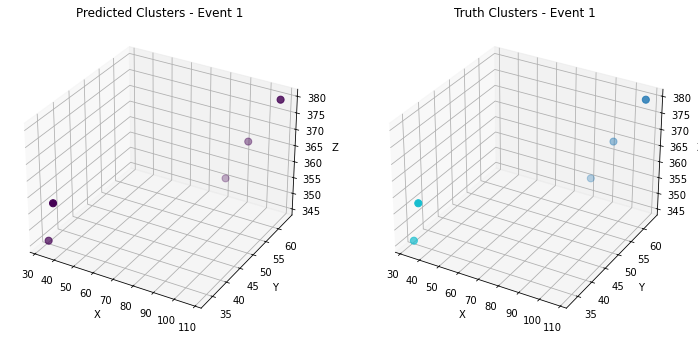

Processing Event 2/3530...


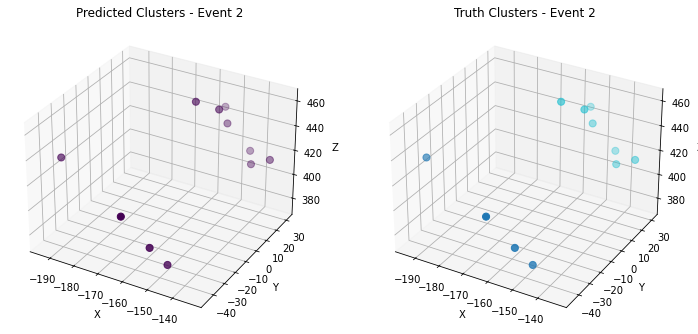

Processing Event 3/3530...


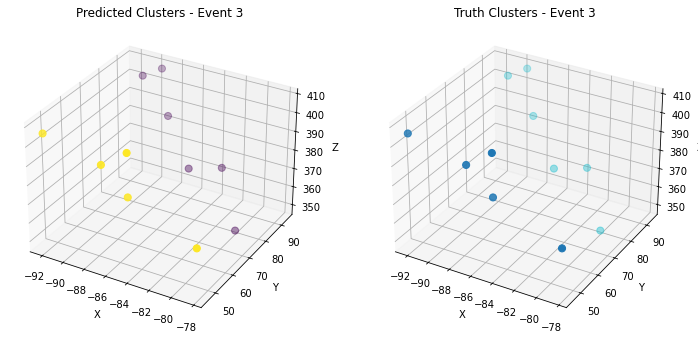

Processing Event 4/3530...


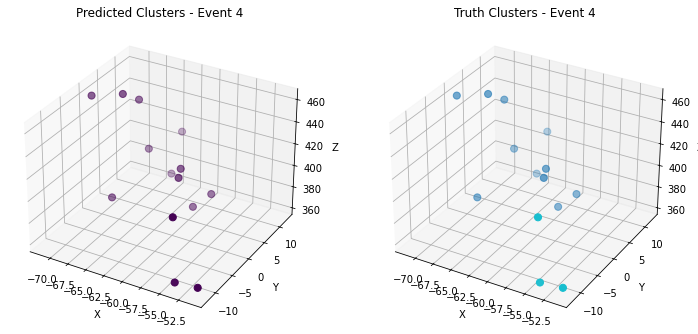

Processing Event 5/3530...


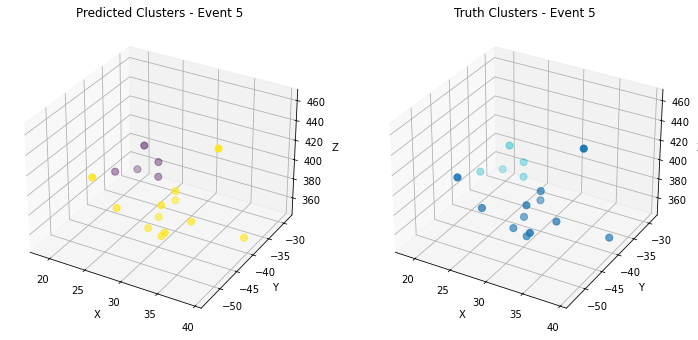

Processing Event 6/3530...


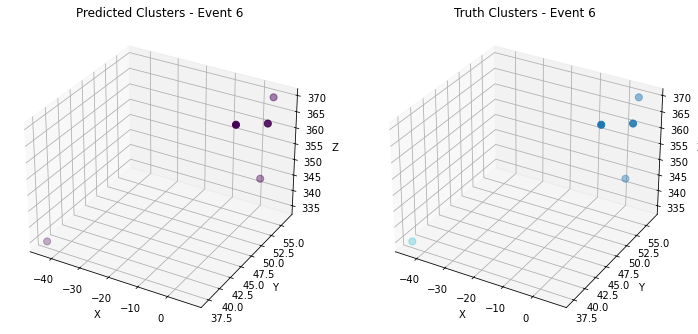

Processing Event 7/3530...


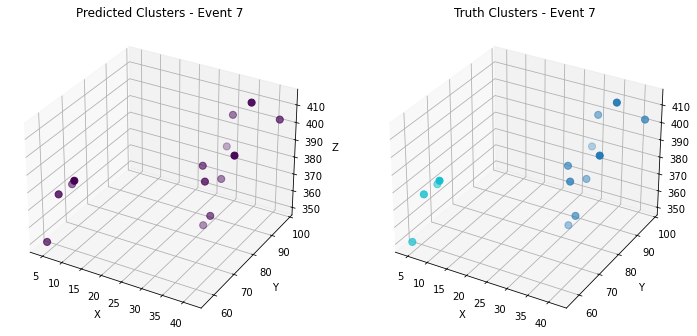

Processing Event 8/3530...


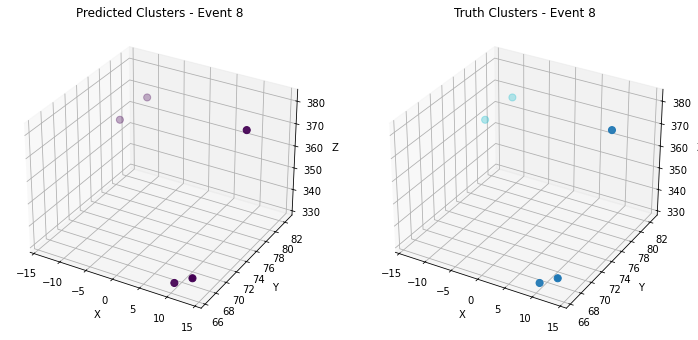

Processing Event 9/3530...


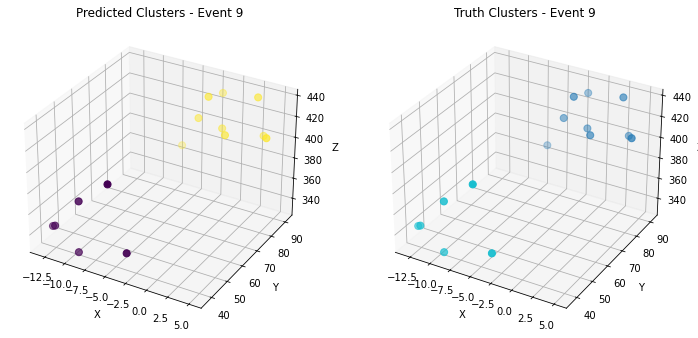

Processing Event 10/3530...


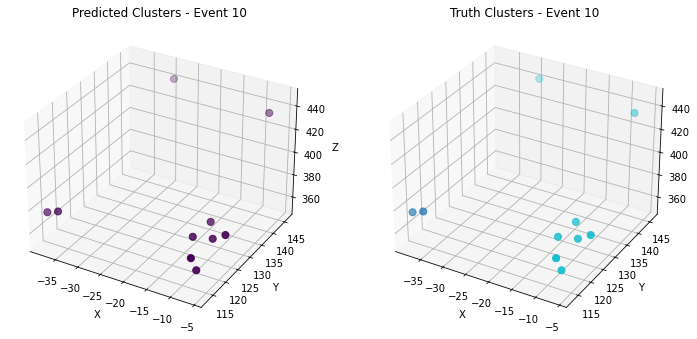

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Function to plot clusters
def plot_clusters(event_idx, xyz_coords, cluster_labels, truth_labels):
    fig = plt.figure(figsize=(12, 6))  # Set up the figure for side-by-side plots

    # Plot 1: Predicted clusters
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(xyz_coords[:, 0], xyz_coords[:, 1], xyz_coords[:, 2], c=cluster_labels, cmap='viridis', s=50)
    ax1.set_title(f"Predicted Clusters - Event {event_idx+1}")
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    # Plot 2: Truth clusters
    ax2 = fig.add_subplot(122, projection='3d')
    truth_colors = [label[0] for label in truth_labels]  # Use first entry of SimLabels as the cluster assignment
    ax2.scatter(xyz_coords[:, 0], xyz_coords[:, 1], xyz_coords[:, 2], c=truth_colors, cmap='tab10', s=50)
    ax2.set_title(f"Truth Clusters - Event {event_idx+1}")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

    plt.show()

# Loop over all events
for event_idx in range(10):
    print(f"Processing Event {event_idx+1}/{len(data_test)}...")

    # Extract data
    xyz_coords = data_test[event_idx].x[:, :3]  # Get x, y, z coordinates
    cluster_labels = all_cluster_labels[event_idx]  # Predicted cluster labels
    truth_labels = data_test[event_idx].assoc  # True SimLabels

    # Convert to numpy if not already
    xyz_coords = xyz_coords.cpu().numpy() if isinstance(xyz_coords, torch.Tensor) else xyz_coords
    cluster_labels = np.array(cluster_labels)
    truth_labels = np.array(truth_labels)

    # Plot for the current event
    plot_clusters(event_idx, xyz_coords, cluster_labels, truth_labels)


# Score Calculations

In [46]:
import torch
import numpy as np
from tqdm import tqdm  # For progress visualization
import pandas as pd
import logging

# Setup Logging
logging.basicConfig(filename='processing_errors.log', level=logging.ERROR,
                    format='%(asctime)s %(levelname)s:%(message)s')

# Initialize a list to store scores for all events
all_scores = []

# Determine the number of events
num_events = len(data_test)

# Iterate over all events with a progress bar
for event_idx in tqdm(range(num_events), desc="Processing Events"):
    try:
        event = data_test[event_idx]

        # Extract x, y, z, energy, and eta
        if isinstance(event.x, torch.Tensor):
            positions = event.x[:, :3].numpy()  # Extract x, y, z
            energies = event.x[:, 3].numpy()
            etas = event.x[:, 4].numpy()
        else:
            positions = event.x[:, :3]
            energies = event.x[:, 3]
            etas = event.x[:, 4]

        positions = np.array(positions)
        energies = np.array(energies)
        etas = np.array(etas)

        # Extract true labels and predicted labels
        true_labels_event = event.assoc[:, 0]
        true_cp_labels = true_labels_event.int().numpy() if isinstance(true_labels_event, torch.Tensor) else true_labels_event.astype(int)
        pred_trackster_labels = np.array(all_cluster_labels[event_idx])

        # Identify unique CP IDs and Trackster IDs
        cp_ids = np.unique(true_cp_labels)
        trackster_ids = np.unique(pred_trackster_labels)

        if len(cp_ids) == 0 or len(trackster_ids) == 0:
            # Handle empty associations
            all_scores.append({
                'event_index': event_idx,
                'cp_id': None,
                'trackster_id': None,
                'sim_to_reco_score': 0.0,
                'reco_to_sim_score': 1.0,
                'cp_energy': 0.0,
                'trackster_energy': 0.0,
                'cp_avg_eta': 0.0,
                'cp_separation': 0.0,
                'energy_diff_ratio': None
            })
            continue

        # Create dictionaries mapping cluster IDs to their particle indices
        cp_clusters = {cp: np.where(true_cp_labels == cp)[0] for cp in cp_ids}
        tst_clusters = {t: np.where(pred_trackster_labels == t)[0] for t in trackster_ids}

        # Compute average positions for each true CP cluster
        cp_avg_positions = {cp: np.mean(positions[indices], axis=0) for cp, indices in cp_clusters.items()}

        # Compute separation between two CP clusters if at least 2 exist
        if len(cp_ids) >= 2:
            cp_separation = np.linalg.norm(cp_avg_positions[cp_ids[0]] - cp_avg_positions[cp_ids[1]])
        else:
            cp_separation = 0.0

        # Compute total energy and average eta for each CP cluster
        cp_total_energy = {cp: np.sum(energies[indices]) for cp, indices in cp_clusters.items()}
        cp_avg_eta = {cp: np.mean(etas[indices]) for cp, indices in cp_clusters.items()}

        # Compute total energy for each Trackster cluster
        tst_total_energy = {t: np.sum(energies[indices]) for t, indices in tst_clusters.items()}

        # Initialize dictionaries to store scores for this event
        sim_to_reco_scores = {}
        reco_to_sim_scores = {}

        # Compute Sim-to-Reco and Reco-to-Sim Scores
        for cp in cp_ids:
            for tst in trackster_ids:
                cp_indices = cp_clusters[cp]
                tst_indices = tst_clusters[tst]

                if cp_total_energy[cp] == 0 or np.sum(energies[tst_indices]) == 0:
                    sim_to_reco_scores[(cp, tst)] = 0.0
                    reco_to_sim_scores[(tst, cp)] = 1.0
                    continue

                # Sim-to-Reco Score
                fr_sc_i_mc = {k: energies[k] / cp_total_energy[cp] for k in cp_indices}
                fr_tst_j_reco = {
                    k: (energies[k] / np.sum(energies[tst_indices]) if k in tst_indices else 0.0)
                    for k in cp_indices
                }
                numerator = sum((fr_tst_j_reco[k] - fr_sc_i_mc[k]) ** 2 * energies[k] ** 2 for k in cp_indices)
                denominator = (sum(fr_sc_i_mc[h] * energies[h] for h in cp_indices)) ** 2
                sim_score = numerator / denominator if denominator != 0 else 0.0

                # Reco-to-Sim Score
                frb_tst_i_reco = {k: energies[k] / np.sum(energies[tst_indices]) for k in tst_indices}
                fr_sc_j_mc = {k: energies[k] / cp_total_energy[cp] if k in cp_indices else 0.0 for k in tst_indices}
                numerator_reco = sum((fr_tst_i_reco[k] - fr_sc_j_mc[k]) ** 2 * energies[k] ** 2 for k in tst_indices)
                denominator_reco = (sum(fr_tst_i_reco[h] * energies[h] for h in tst_indices)) ** 2
                reco_score = numerator_reco / denominator_reco if denominator_reco != 0 else 0.0

                # Calculate energy difference ratio
                energy_diff_ratio = (tst_total_energy[tst] - cp_total_energy[cp]) / cp_total_energy[cp]

                # Append to all_scores
                all_scores.append({
                    'event_index': event_idx,
                    'cp_id': cp,
                    'trackster_id': tst,
                    'sim_to_reco_score': sim_score,
                    'reco_to_sim_score': reco_score,
                    'cp_energy': cp_total_energy[cp],
                    'trackster_energy': tst_total_energy[tst],
                    'cp_avg_eta': cp_avg_eta[cp],
                    'cp_separation': cp_separation,
                    'energy_diff_ratio': energy_diff_ratio
                })

    except Exception as e:
        logging.error(f"Error processing event {event_idx}: {e}")
        all_scores.append({
            'event_index': event_idx,
            'cp_id': None,
            'trackster_id': None,
            'sim_to_reco_score': 0.0,
            'reco_to_sim_score': 1.0,
            'cp_energy': 0.0,
            'trackster_energy': 0.0,
            'cp_avg_eta': 0.0,
            'cp_separation': 0.0,
            'energy_diff_ratio': None
        })

# Convert all_scores to a DataFrame
df_scores = pd.DataFrame(all_scores, columns=[
    'event_index',
    'cp_id',
    'trackster_id',
    'sim_to_reco_score',
    'reco_to_sim_score',
    'cp_energy',
    'trackster_energy',
    'cp_avg_eta',
    'cp_separation',
    'energy_diff_ratio'
])

# Display the DataFrame
print(df_scores.head())

Processing Events: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3530/3530 [00:12<00:00, 277.37it/s]

   event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score  \
0            0    NaN           NaN                0.0                1.0   
1            1    NaN           NaN                0.0                1.0   
2            2    NaN           NaN                0.0                1.0   
3            3    NaN           NaN                0.0                1.0   
4            4    NaN           NaN                0.0                1.0   

   cp_energy  trackster_energy  cp_avg_eta  cp_separation  energy_diff_ratio  
0        0.0               0.0         0.0            0.0                NaN  
1        0.0               0.0         0.0            0.0                NaN  
2        0.0               0.0         0.0            0.0                NaN  
3        0.0               0.0         0.0            0.0                NaN  
4        0.0               0.0         0.0            0.0                NaN  


# Purity + Efficiency

In [47]:
print(df_scores)

      event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score  \
0               0    NaN           NaN                0.0                1.0   
1               1    NaN           NaN                0.0                1.0   
2               2    NaN           NaN                0.0                1.0   
3               3    NaN           NaN                0.0                1.0   
4               4    NaN           NaN                0.0                1.0   
...           ...    ...           ...                ...                ...   
3570         3525    NaN           NaN                0.0                1.0   
3571         3526    NaN           NaN                0.0                1.0   
3572         3527    NaN           NaN                0.0                1.0   
3573         3528    NaN           NaN                0.0                1.0   
3574         3529    NaN           NaN                0.0                1.0   

      cp_energy  trackster_energy  cp_a

In [68]:
import pandas as pd

# Assuming df_scores is your DataFrame
# If not already done, ensure 'cp_id' and 'trackster_id' are treated as numeric types
df_scores['cp_id'] = pd.to_numeric(df_scores['cp_id'], errors='coerce')
df_scores['trackster_id'] = pd.to_numeric(df_scores['trackster_id'], errors='coerce')

# ---- Efficiency Calculation ----

# Step 1: Exclude rows where 'cp_id' is NaN as they don't represent valid CPs
cp_valid = df_scores.dropna(subset=['cp_id']).copy()

# Step 2: Group by 'event_index' and 'cp_id' to get unique CPs
cp_grouped = cp_valid.groupby(['event_index', 'cp_id'])

# Step 3: For each CP, check if any 'sim_to_reco_score' < 0.2
# This returns a Series with MultiIndex (event_index, cp_id) and boolean values
cp_associated = cp_grouped['sim_to_reco_score'].min() < 0.2

# Step 4: Calculate the number of associated CPs and total CPs
num_associated_cp = cp_associated.sum()
total_cp = cp_associated.count()

# Step 5: Compute Efficiency
efficiency = num_associated_cp / total_cp if total_cp > 0 else 0

print(f"Efficiency: {efficiency:.4f} ({num_associated_cp} associated CPs out of {total_cp} total CPs)")

# ---- Purity Calculation ----

# Step 1: Exclude rows where 'trackster_id' is NaN as they don't represent valid Tracksters
tst_valid = df_scores.dropna(subset=['trackster_id']).copy()

# Step 2: Group by 'event_index' and 'trackster_id' to get unique Tracksters
tst_grouped = tst_valid.groupby(['event_index', 'trackster_id'])

# Step 3: For each Trackster, check if any 'reco_to_sim_score' < 0.2
# This returns a Series with MultiIndex (event_index, trackster_id) and boolean values
tst_associated = tst_grouped['reco_to_sim_score'].min() < 0.2

# Step 4: Calculate the number of associated Tracksters and total Tracksters
num_associated_tst = tst_associated.sum()
total_tst = tst_associated.count()

# Step 5: Compute Purity
purity = num_associated_tst / total_tst if total_tst > 0 else 0

print(f"Purity: {purity:.4f} ({num_associated_tst} associated Tracksters out of {total_tst} total Tracksters)")


Efficiency: 0.8874 (6109 associated CPs out of 6884 total CPs)
Purity: 0.4810 (6730 associated Tracksters out of 13992 total Tracksters)


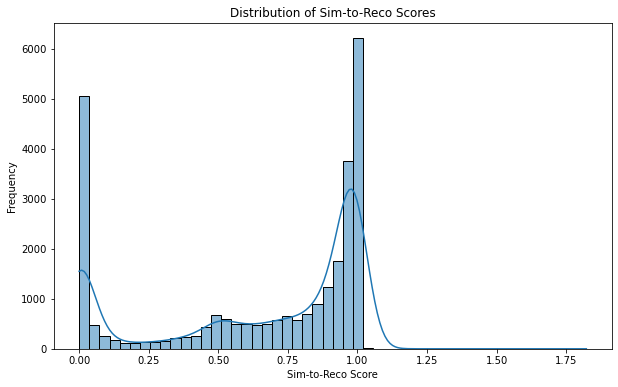

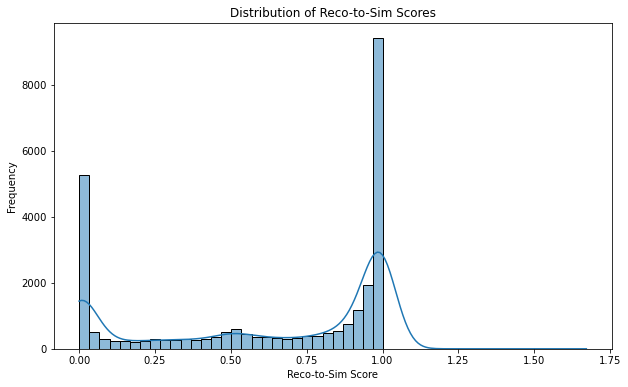

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Efficiency and Purity Scores
# Note: The above code calculates global Efficiency and Purity.
# To visualize per-event Efficiency and Purity, modify the approach accordingly.

# Example: Visualizing the Distribution of Sim-to-Reco Scores
plt.figure(figsize=(10, 6))
sns.histplot(cp_valid['sim_to_reco_score'], bins=50, kde=True)
plt.title('Distribution of Sim-to-Reco Scores')
plt.xlabel('Sim-to-Reco Score')
plt.ylabel('Frequency')
plt.show()

# Example: Visualizing the Distribution of Reco-to-Sim Scores
plt.figure(figsize=(10, 6))
sns.histplot(tst_valid['reco_to_sim_score'], bins=50, kde=True)
plt.title('Distribution of Reco-to-Sim Scores')
plt.xlabel('Reco-to-Sim Score')
plt.ylabel('Frequency')
plt.show()


# Plot vs params

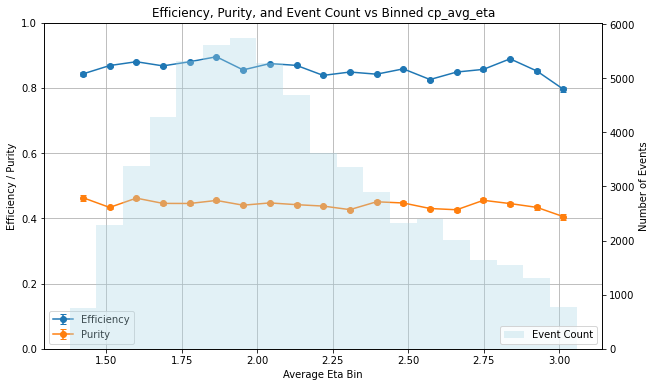

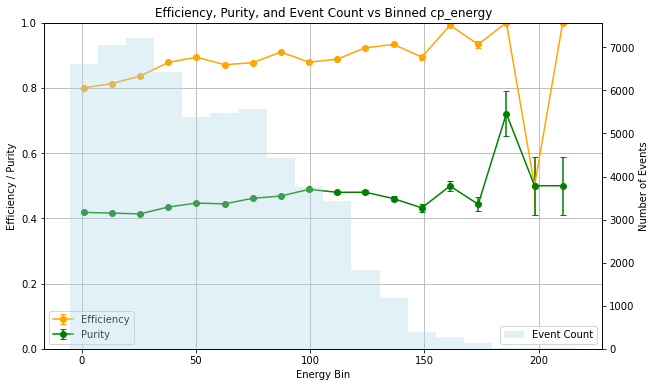

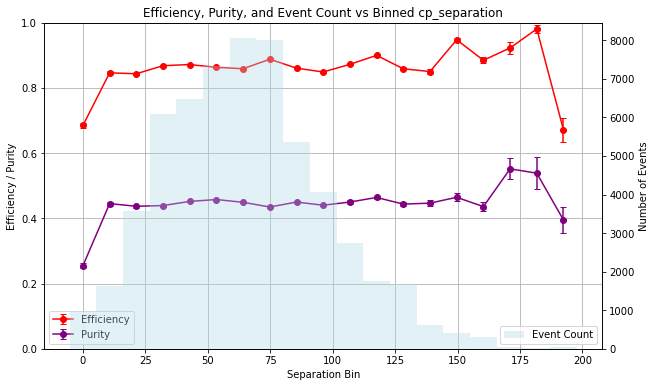

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_scores is the DataFrame provided
df_scores['cp_id'] = pd.to_numeric(df_scores['cp_id'], errors='coerce')
df_scores['trackster_id'] = pd.to_numeric(df_scores['trackster_id'], errors='coerce')

# ---- Efficiency Calculation ----
cp_valid = df_scores.dropna(subset=['cp_id']).copy()
cp_grouped = cp_valid.groupby(['event_index', 'cp_id'])
cp_associated = cp_grouped['sim_to_reco_score'].min() < 0.2
cp_efficiency = cp_associated.groupby(level=0).mean().reset_index(name='efficiency')
cp_valid = cp_valid.merge(cp_efficiency, on='event_index', how='left')

# ---- Purity Calculation ----
tst_valid = df_scores.dropna(subset=['trackster_id']).copy()
tst_grouped = tst_valid.groupby(['event_index', 'trackster_id'])
tst_associated = tst_grouped['reco_to_sim_score'].min() < 0.2
tst_purity = tst_associated.groupby(level=0).mean().reset_index(name='purity')
tst_valid = tst_valid.merge(tst_purity, on='event_index', how='left')

# Merge purity and efficiency into a single DataFrame
df_plot = pd.merge(cp_valid[['event_index', 'cp_avg_eta', 'cp_energy', 'cp_separation', 'efficiency']],
                   tst_valid[['event_index', 'purity']],
                   on='event_index',
                   how='inner')

# ---- Binning ----
eta_bins = np.linspace(df_plot['cp_avg_eta'].min(), df_plot['cp_avg_eta'].max(), 20)
energy_bins = np.linspace(df_plot['cp_energy'].min(), df_plot['cp_energy'].max(), 20)
separation_bins = np.linspace(df_plot['cp_separation'].min(), df_plot['cp_separation'].max(), 20)

df_plot['eta_bin'] = pd.cut(df_plot['cp_avg_eta'], bins=eta_bins, labels=False, include_lowest=True)
df_plot['energy_bin'] = pd.cut(df_plot['cp_energy'], bins=energy_bins, labels=False, include_lowest=True)
df_plot['separation_bin'] = pd.cut(df_plot['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

def calculate_bin_error(numerator, denominator):
    if denominator > 0:
        efficiency = numerator / denominator
        error = np.sqrt(efficiency * (1 - efficiency) / denominator)
    else:
        efficiency = 0.0
        error = 0.0
    return efficiency, error

# Function to group data for plots
def aggregate_bins(data, bin_col):
    return data.groupby(bin_col).apply(lambda g: pd.Series({
        'efficiency_mean': g['efficiency'].mean(),
        'efficiency_error': calculate_bin_error(g['efficiency'].sum(), len(g))[1],
        'purity_mean': g['purity'].mean(),
        'purity_error': calculate_bin_error(g['purity'].sum(), len(g))[1],
        'count': len(g) // 4
    })).reset_index()

# Aggregate data for eta, energy, and separation bins
eta_group = aggregate_bins(df_plot, 'eta_bin')
energy_group = aggregate_bins(df_plot, 'energy_bin')
separation_group = aggregate_bins(df_plot, 'separation_bin')

# Bin centers
eta_group_bins = eta_bins[:-1][:len(eta_group)]
energy_group_bins = energy_bins[:-1][:len(energy_group)]
separation_group_bins = separation_bins[:-1][:len(separation_group)]

# ---- Plot Efficiency vs Binned cp_avg_eta ----
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.errorbar(eta_group_bins, eta_group['efficiency_mean'], yerr=eta_group['efficiency_error'], label='Efficiency', fmt='o', linestyle='-', capsize=3)
ax1.errorbar(eta_group_bins, eta_group['purity_mean'], yerr=eta_group['purity_error'], label='Purity', fmt='o', linestyle='-', capsize=3)
ax1.set_ylim(0, 1)
ax1.set_xlabel('Average Eta Bin')
ax1.set_ylabel('Efficiency / Purity')
ax1.legend(loc='lower left')
ax1.grid()

ax2.bar(eta_group_bins, eta_group['count'], width=(eta_bins[1] - eta_bins[0]), color='lightblue', alpha=0.35, label='Event Count')
ax2.set_ylabel('Number of Events')
ax2.legend(loc='lower right')

plt.title('Efficiency, Purity, and Event Count vs Binned cp_avg_eta')
plt.show()

# ---- Plot Efficiency vs Binned cp_energy ----
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.errorbar(energy_group_bins, energy_group['efficiency_mean'], yerr=energy_group['efficiency_error'], label='Efficiency', fmt='o', linestyle='-', capsize=3, color='orange')
ax1.errorbar(energy_group_bins, energy_group['purity_mean'], yerr=energy_group['purity_error'], label='Purity', fmt='o', linestyle='-', capsize=3, color='green')
ax1.set_ylim(0, 1)
ax1.set_xlabel('Energy Bin')
ax1.set_ylabel('Efficiency / Purity')
ax1.legend(loc='lower left')
ax1.grid()

ax2.bar(energy_group_bins, energy_group['count'], width=(energy_bins[1] - energy_bins[0]), color='lightblue', alpha=0.35, label='Event Count')
ax2.set_ylabel('Number of Events')
ax2.legend(loc='lower right')

plt.title('Efficiency, Purity, and Event Count vs Binned cp_energy')
plt.show()

# ---- Plot Efficiency vs Binned cp_separation ----
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.errorbar(separation_group_bins, separation_group['efficiency_mean'], yerr=separation_group['efficiency_error'], label='Efficiency', fmt='o', linestyle='-', capsize=3, color='red')
ax1.errorbar(separation_group_bins, separation_group['purity_mean'], yerr=separation_group['purity_error'], label='Purity', fmt='o', linestyle='-', capsize=3, color='purple')
ax1.set_ylim(0, 1)
ax1.set_xlabel('Separation Bin')
ax1.set_ylabel('Efficiency / Purity')
ax1.legend(loc='lower left')
ax1.grid()

ax2.bar(separation_group_bins, separation_group['count'], width=(separation_bins[1] - separation_bins[0]), color='lightblue', alpha=0.35, label='Event Count')
ax2.set_ylabel('Number of Events')
ax2.legend(loc='lower right')

plt.title('Efficiency, Purity, and Event Count vs Binned cp_separation')
plt.show()


# Plotting Sigma

/tmp/ipykernel_3539577/1542842054.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  associated_scores['separation_bin'] = pd.cut(associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)


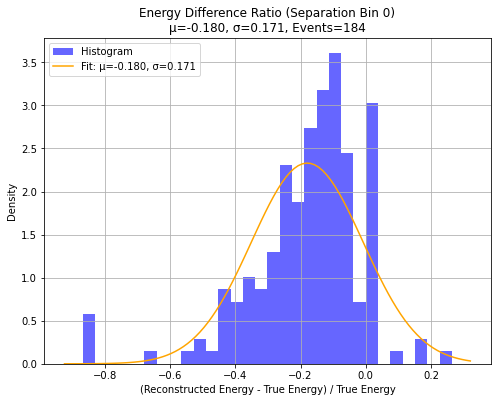

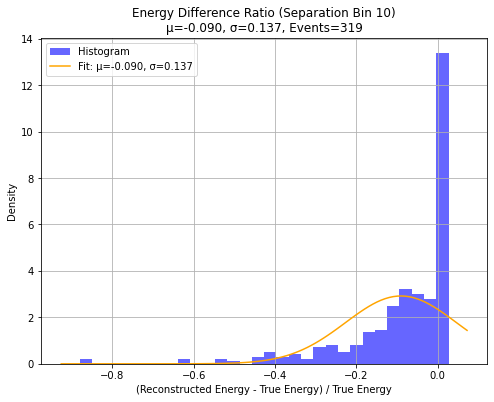

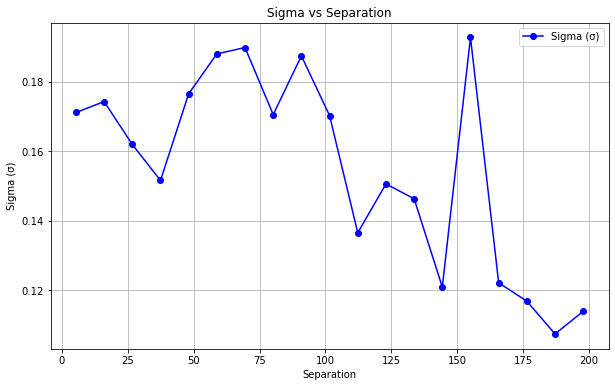

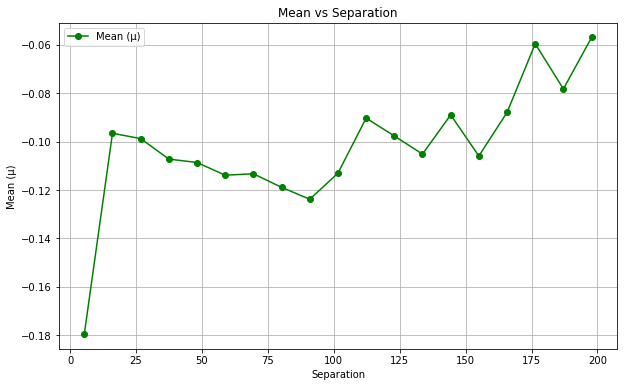

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Filter to include only associated events (reco-to-sim score < 0.2)
associated_scores = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Define bins for cp_separation
separation_bins = np.linspace(associated_scores['cp_separation'].min(), associated_scores['cp_separation'].max(), 20)
associated_scores['separation_bin'] = pd.cut(associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

# Initialize lists to store results
separation_bin_centers = []
sigma_values = []
mean_values = []
event_counts = []

# Loop through each separation bin
for bin_idx in range(len(separation_bins) - 1):
    # Select data for the current bin
    bin_data = associated_scores[associated_scores['separation_bin'] == bin_idx]['energy_diff_ratio']
    
    # Skip if no data in this bin
    if bin_data.empty:
        continue
    
    # Fit a Gaussian to the data
    mu, sigma = norm.fit(bin_data)
    
    # Store results
    bin_center = (separation_bins[bin_idx] + separation_bins[bin_idx + 1]) / 2
    separation_bin_centers.append(bin_center)
    sigma_values.append(sigma)
    mean_values.append(mu)
    event_counts.append(len(bin_data))

    # Plot a couple of example histograms for reference
    if bin_idx == 0 or bin_idx == len(separation_bins) // 2:  # Example: First and middle bins
        plt.figure(figsize=(8, 6))
        plt.hist(bin_data, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, sigma)
        plt.plot(x, p, 'orange', label=f'Fit: μ={mu:.3f}, σ={sigma:.3f}')
        plt.title(f'Energy Difference Ratio (Separation Bin {bin_idx})\nμ={mu:.3f}, σ={sigma:.3f}, Events={len(bin_data)}')
        plt.xlabel('(Reconstructed Energy - True Energy) / True Energy')
        plt.ylabel('Density')
        plt.legend()
        plt.grid()
        plt.show()

# Plot σ (sigma) vs Separation
plt.figure(figsize=(10, 6))
plt.plot(separation_bin_centers, sigma_values, 'o-', label='Sigma (σ)', color='blue')
plt.xlabel('Separation')
plt.ylabel('Sigma (σ)')
plt.title('Sigma vs Separation')
plt.grid()
plt.legend()
plt.show()

# Plot μ (mean) vs Separation
plt.figure(figsize=(10, 6))
plt.plot(separation_bin_centers, mean_values, 'o-', label='Mean (μ)', color='green')
plt.xlabel('Separation')
plt.ylabel('Mean (μ)')
plt.title('Mean vs Separation')
plt.grid()
plt.legend()
plt.show()


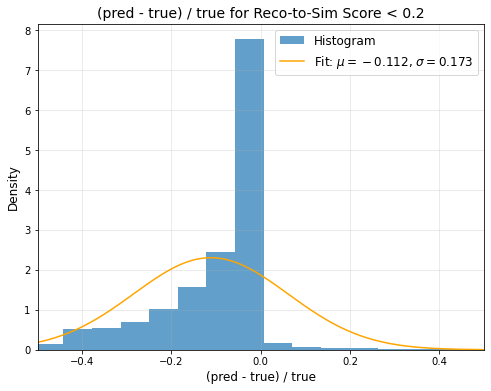

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_scores is your DataFrame with all the relevant data
# Filter the DataFrame for reco-to-sim scores < 0.2
filtered_df = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Calculate the (pred - true) / true for energy_diff_ratio (or adjust the column name as needed)
# Assuming 'energy_diff_ratio' is the column of interest for (pred - true) / true
values = filtered_df['energy_diff_ratio']

# Plot the histogram
plt.figure(figsize=(8, 6))
counts, bins, patches = plt.hist(values, bins=50, density=True, alpha=0.7, label='Histogram')

# Fit a Gaussian distribution to the data
mu, sigma = np.mean(values), np.std(values)
x = np.linspace(bins[0], bins[-1], 1000)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
plt.plot(x, pdf, label=f'Fit: $\mu={mu:.3f}$, $\sigma={sigma:.3f}$', color='orange')

# Add labels and title
plt.title('(pred - true) / true for Reco-to-Sim Score < 0.2', fontsize=14)
plt.xlim(-0.5, 0.5)
plt.xlabel('(pred - true) / true', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Save or show the plot
plt.show()


/tmp/ipykernel_3539577/2270509428.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reconstructed_df['energy_bin'] = pd.cut(reconstructed_df['trackster_energy'], bins=energy_bins)


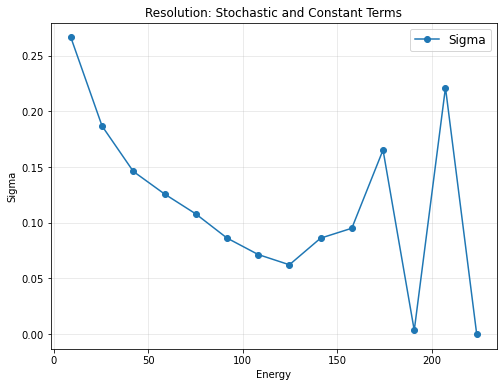

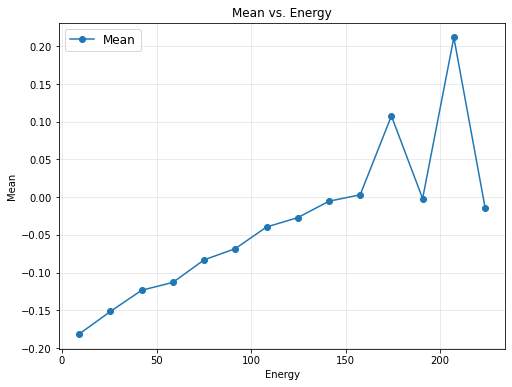

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming df_scores is your DataFrame with all the relevant data
# Filter the DataFrame for tracksters that have been reconstructed (reco_to_sim_score < 0.2)
reconstructed_df = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Group the data into energy bins
energy_bins = np.linspace(reconstructed_df['trackster_energy'].min(), reconstructed_df['trackster_energy'].max(), 15)
reconstructed_df['energy_bin'] = pd.cut(reconstructed_df['trackster_energy'], bins=energy_bins)

# Initialize lists to store results
bin_centers = []
sigmas = []
means = []

# Loop over each bin
for energy_bin, group in reconstructed_df.groupby('energy_bin'):
    if group.empty:
        continue

    # Calculate the bin center
    bin_center = (energy_bin.left + energy_bin.right) / 2
    bin_centers.append(bin_center)

    # Fit a Gaussian to the (pred - true) / true values
    values = group['energy_diff_ratio']
    mu, sigma = norm.fit(values)

    # Store the mean and sigma
    means.append(mu)
    sigmas.append(sigma)

# Plot sigma vs. energy
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, sigmas, 'o-', label='Sigma')
plt.title('Resolution: Stochastic and Constant Terms')
plt.xlabel('Energy')
plt.ylabel('Sigma')
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

# Plot mean vs. energy
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, means, 'o-', label='Mean')
plt.title('Mean vs. Energy')
plt.xlabel('Energy')
plt.ylabel('Mean')
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


# ROC curve

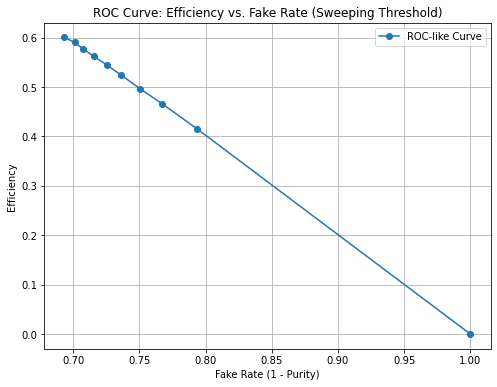

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_scores is your DataFrame:
df_scores['cp_id'] = pd.to_numeric(df_scores['cp_id'], errors='coerce')
df_scores['trackster_id'] = pd.to_numeric(df_scores['trackster_id'], errors='coerce')

# Prepare groupings that won't change as threshold sweeps:
# For efficiency calculation:
cp_valid = df_scores.dropna(subset=['cp_id']).copy()
cp_grouped = cp_valid.groupby(['event_index', 'cp_id'])

# For purity calculation:
tst_valid = df_scores.dropna(subset=['trackster_id']).copy()
tst_grouped = tst_valid.groupby(['event_index', 'trackster_id'])

thresholds = np.linspace(0, 0.01, 10)
efficiencies = []
fake_rates = []

for t in thresholds:
    # Compute Efficiency at threshold t
    # Check if CP is associated: min(sim_to_reco_score) < t
    cp_associated = cp_grouped['sim_to_reco_score'].min() < t
    num_associated_cp = cp_associated.sum()
    total_cp = cp_associated.count()
    efficiency = num_associated_cp / total_cp if total_cp > 0 else 0.0

    # Compute Purity at threshold t
    # Check if Trackster is associated: min(reco_to_sim_score) < t
    tst_associated = tst_grouped['reco_to_sim_score'].min() < t
    num_associated_tst = tst_associated.sum()
    total_tst = tst_associated.count()
    purity = num_associated_tst / total_tst if total_tst > 0 else 0.0

    # Compute Fake Rate = 1 - Purity
    fake_rate = 1 - purity

    efficiencies.append(efficiency)
    fake_rates.append(fake_rate)

# Plot the ROC-like curve
plt.figure(figsize=(8,6))
plt.plot(fake_rates, efficiencies, marker='o', linestyle='-', label='ROC-like Curve')
plt.xlabel('Fake Rate (1 - Purity)')
plt.ylabel('Efficiency')
plt.title('ROC Curve: Efficiency vs. Fake Rate (Sweeping Threshold)')
plt.grid(True)
plt.legend()
plt.show()


In [66]:
print(efficiencies)

[0.0, 0.2765724988294053, 0.28687373185578274, 0.2937412205400343, 0.30201342281879195, 0.30763227719681596, 0.3109099422506633, 0.31543624161073824, 0.3190260652411425, 0.3224598095832683]


# Test

In [20]:
import torch
import numpy as np
from tqdm import tqdm  # For progress visualization
import pandas as pd
import logging

# Setup Logging
logging.basicConfig(filename='processing_errors.log', level=logging.ERROR,
                    format='%(asctime)s %(levelname)s:%(message)s')

# Define a simple Event class
class Event:
    def __init__(self, x, assoc):
        self.x = x  # Tensor or numpy array
        self.assoc = assoc  # Tensor or numpy array


In [21]:
# Define particles as per the numerical example
# Columns: x, y, z, energy, eta
# Particle 0: (0,0,0), 10, 1.0, cp=0, tst=0
# Particle 1: (1,0,0), 20, 1.1, cp=0, tst=0
# Particle 2: (0,1,0), 30, 2.0, cp=1, tst=1
# Particle 3: (1,1,0), 40, 2.1, cp=1, tst=1

# Create x: shape (num_particles, 5)
x = np.array([
    [0, 0, 0, 10, 1.0],
    [1, 0, 0, 20, 1.1],
    [0, 1, 0, 30, 2.0],
    [1, 1, 0, 40, 2.1],
])

# Create assoc: shape (num_particles, 1)
assoc = np.array([
    [0],
    [0],
    [1],
    [1],
])

# Create a single event
event = Event(x=x, assoc=assoc)

# data_test contains one event
data_test = [event]

# Define all_cluster_labels: list of lists, one per event
# For event 0: Trackster 0 contains particles 0 and 1, Trackster 1 contains 2 and 3
all_cluster_labels = [
    [0, 0, 1, 1]
]


In [22]:
# Initialize a list to store scores for all events
all_scores = []

# Determine the number of events
num_events = len(data_test)

# Iterate over all events with a progress bar
for event_idx in tqdm(range(num_events), desc="Processing Events"):
    try:
        event = data_test[event_idx]

        # Extract x, y, z, energy, and eta
        if isinstance(event.x, torch.Tensor):
            positions = event.x[:, :3].numpy()  # Extract x, y, z
            energies = event.x[:, 3].numpy()
            etas = event.x[:, 4].numpy()
        else:
            positions = event.x[:, :3]
            energies = event.x[:, 3]
            etas = event.x[:, 4]

        positions = np.array(positions)
        energies = np.array(energies)
        etas = np.array(etas)

        # Extract true labels and predicted labels
        true_labels_event = event.assoc[:, 0]
        true_cp_labels = true_labels_event.astype(int) if isinstance(true_labels_event, np.ndarray) else true_labels_event.int().numpy()
        pred_trackster_labels = np.array(all_cluster_labels[event_idx])

        # Identify unique CP IDs and Trackster IDs
        cp_ids = np.unique(true_cp_labels)
        trackster_ids = np.unique(pred_trackster_labels)

        if len(cp_ids) == 0 or len(trackster_ids) == 0:
            # Handle empty associations
            all_scores.append({
                'event_index': event_idx,
                'cp_id': None,
                'trackster_id': None,
                'sim_to_reco_score': 0.0,
                'reco_to_sim_score': 1.0,
                'cp_energy': 0.0,
                'trackster_energy': 0.0,
                'cp_avg_eta': 0.0,
                'cp_separation': 0.0,
                'energy_diff_ratio': None
            })
            continue

        # Create dictionaries mapping cluster IDs to their particle indices
        cp_clusters = {cp: np.where(true_cp_labels == cp)[0] for cp in cp_ids}
        tst_clusters = {t: np.where(pred_trackster_labels == t)[0] for t in trackster_ids}

        # Compute average positions for each true CP cluster
        cp_avg_positions = {cp: np.mean(positions[indices], axis=0) for cp, indices in cp_clusters.items()}

        # Compute separation between two CP clusters if at least 2 exist
        if len(cp_ids) >= 2:
            cp_separation = np.linalg.norm(cp_avg_positions[cp_ids[0]] - cp_avg_positions[cp_ids[1]])
        else:
            cp_separation = 0.0

        # Compute total energy and average eta for each CP cluster
        cp_total_energy = {cp: np.sum(energies[indices]) for cp, indices in cp_clusters.items()}
        cp_avg_eta = {cp: np.mean(etas[indices]) for cp, indices in cp_clusters.items()}

        # Compute total energy for each Trackster cluster
        tst_total_energy = {t: np.sum(energies[indices]) for t, indices in tst_clusters.items()}

        # Initialize dictionaries to store scores for this event
        sim_to_reco_scores = {}
        reco_to_sim_scores = {}

        # Compute Sim-to-Reco and Reco-to-Sim Scores
        for cp in cp_ids:
            for tst in trackster_ids:
                cp_indices = cp_clusters[cp]
                tst_indices = tst_clusters[tst]

                if cp_total_energy[cp] == 0 or np.sum(energies[tst_indices]) == 0:
                    sim_to_reco_scores[(cp, tst)] = 0.0
                    reco_to_sim_scores[(tst, cp)] = 1.0
                    # Append to all_scores
                    all_scores.append({
                        'event_index': event_idx,
                        'cp_id': cp,
                        'trackster_id': tst,
                        'sim_to_reco_score': 0.0,
                        'reco_to_sim_score': 1.0,
                        'cp_energy': cp_total_energy[cp],
                        'trackster_energy': tst_total_energy[tst],
                        'cp_avg_eta': cp_avg_eta[cp],
                        'cp_separation': cp_separation,
                        'energy_diff_ratio': (tst_total_energy[tst] - cp_total_energy[cp]) / cp_total_energy[cp]
                    })
                    continue

                # Sim-to-Reco Score
                fr_sc_i_mc = {k: energies[k] / cp_total_energy[cp] for k in cp_indices}
                fr_tst_j_reco = {
                    k: (energies[k] / np.sum(energies[tst_indices]) if k in tst_indices else 0.0)
                    for k in cp_indices
                }
                numerator = sum((fr_tst_j_reco[k] - fr_sc_i_mc[k]) ** 2 * energies[k] ** 2 for k in cp_indices)
                denominator = (sum(fr_sc_i_mc[h] * energies[h] for h in cp_indices)) ** 2
                sim_score = numerator / denominator if denominator != 0 else 0.0

                # Reco-to-Sim Score
                fr_tst_i_reco = {k: energies[k] / np.sum(energies[tst_indices]) for k in tst_indices}
                fr_sc_j_mc = {k: energies[k] / cp_total_energy[cp] if k in cp_indices else 0.0 for k in tst_indices}
                numerator_reco = sum((fr_tst_i_reco[k] - fr_sc_j_mc[k]) ** 2 * energies[k] ** 2 for k in tst_indices)
                denominator_reco = (sum(fr_tst_i_reco[h] * energies[h] for h in tst_indices)) ** 2
                reco_score = numerator_reco / denominator_reco if denominator_reco != 0 else 0.0

                # Calculate energy difference ratio
                energy_diff_ratio = (tst_total_energy[tst] - cp_total_energy[cp]) / cp_total_energy[cp]

                # Append to all_scores
                all_scores.append({
                    'event_index': event_idx,
                    'cp_id': cp,
                    'trackster_id': tst,
                    'sim_to_reco_score': sim_score,
                    'reco_to_sim_score': reco_score,
                    'cp_energy': cp_total_energy[cp],
                    'trackster_energy': tst_total_energy[tst],
                    'cp_avg_eta': cp_avg_eta[cp],
                    'cp_separation': cp_separation,
                    'energy_diff_ratio': energy_diff_ratio
                })

    except Exception as e:
        logging.error(f"Error processing event {event_idx}: {e}")
        all_scores.append({
            'event_index': event_idx,
            'cp_id': None,
            'trackster_id': None,
            'sim_to_reco_score': 0.0,
            'reco_to_sim_score': 1.0,
            'cp_energy': 0.0,
            'trackster_energy': 0.0,
            'cp_avg_eta': 0.0,
            'cp_separation': 0.0,
            'energy_diff_ratio': None
        })


Processing Events: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 830.39it/s]


In [23]:
# Convert all_scores to a DataFrame
df_scores = pd.DataFrame(all_scores, columns=[
    'event_index',
    'cp_id',
    'trackster_id',
    'sim_to_reco_score',
    'reco_to_sim_score',
    'cp_energy',
    'trackster_energy',
    'cp_avg_eta',
    'cp_separation',
    'energy_diff_ratio'
])

# Display the DataFrame
print(df_scores)


   event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score  \
0            0      0             0             0.0000             0.0000   
1            0      0             1             0.6800             0.5392   
2            0      1             0             0.5392             0.6800   
3            0      1             1             0.0000             0.0000   

   cp_energy  trackster_energy  cp_avg_eta  cp_separation  energy_diff_ratio  
0       30.0              30.0        1.05            1.0           0.000000  
1       30.0              70.0        1.05            1.0           1.333333  
2       70.0              30.0        2.05            1.0          -0.571429  
3       70.0              70.0        2.05            1.0           0.000000  


In [84]:
print('yay')

yay


# Check other data

In [85]:
import uproot

In [86]:
file = uproot.open('/vols/cms/bmaier/hgcal/data/20230701_multi_particles/test/raw/particles_10_8373759_ntuple.root')

In [88]:
print(file.keys())

['ticlNtuplizer;1', 'ticlNtuplizer/tracksters;1', 'ticlNtuplizer/clusters;1', 'ticlNtuplizer/graph;1', 'ticlNtuplizer/candidates;1', 'ticlNtuplizer/trackstersMerged;1', 'ticlNtuplizer/associations;1', 'ticlNtuplizer/simtrackstersSC;1', 'ticlNtuplizer/simtrackstersCP;1', 'ticlNtuplizer/tracks;1']


In [89]:
track = file['ticlNtuplizer/tracksters;1']

In [90]:
print(track.keys())

['event', 'NClusters', 'NTracksters', 'time', 'timeError', 'regressed_energy', 'raw_energy', 'raw_em_energy', 'raw_pt', 'raw_em_pt', 'barycenter_x', 'barycenter_y', 'barycenter_z', 'trackster_barycenter_eta', 'trackster_barycenter_phi', 'EV1', 'EV2', 'EV3', 'eVector0_x', 'eVector0_y', 'eVector0_z', 'sigmaPCA1', 'sigmaPCA2', 'sigmaPCA3', 'id_probabilities', 'vertices_indexes', 'vertices_x', 'vertices_y', 'vertices_z', 'vertices_time', 'vertices_timeErr', 'vertices_energy', 'vertices_correctedEnergy', 'vertices_correctedEnergyUncertainty', 'vertices_multiplicity', 'layer_cluster_seed']


In [92]:
v_x = track['barycenter_x'].array()

In [97]:
print(len(v_x[0]))

31
